# Model Development

- customer segmentation by RFM (Done)
- market basket analysis (Done)
- demand forecasting (In progress)
- churn prediction (In progress)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="dark")
import numpy as np
from scipy import stats

In [2]:
df = pd.read_parquet("./data/ecomm_invoice_transaction.parquet")
print(f"data shape: {df.shape}")
df.head()

data shape: (541909, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## Step 1: Remove Defective Data and Ouliers

In [3]:
defect_index = df[(df['Quantity'] < 0) & (df['UnitPrice'] == 0)].index
df = df.drop(index=defect_index)
df = df.reset_index(drop=True)
print(f"datashape: {df.shape}")
df.head()

datashape: (540573, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


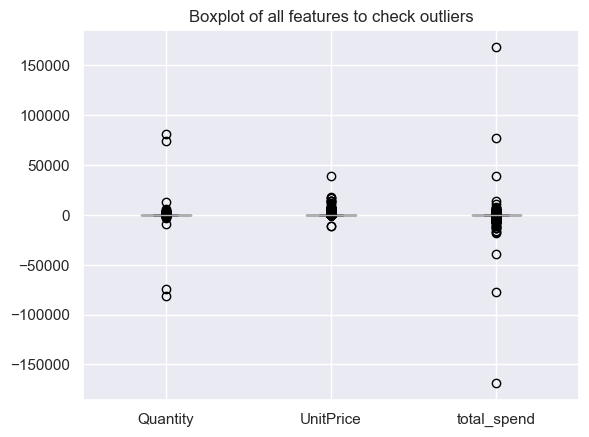

In [4]:
df.drop(columns=['CustomerID']).boxplot()
plt.title("Boxplot of all features to check outliers")
plt.show()

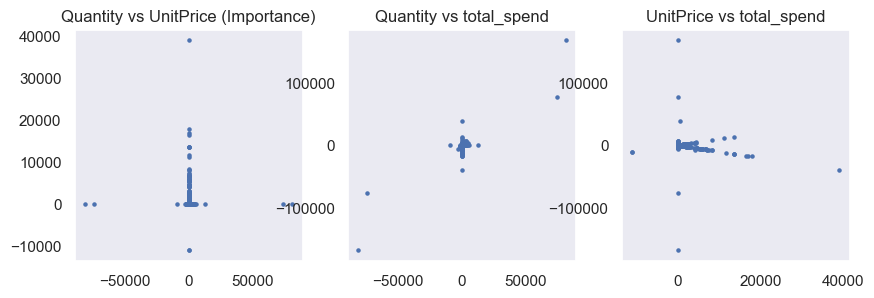

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
ax[0].scatter(x=df['Quantity'], y=df['UnitPrice'], s=5)
ax[0].title.set_text('Quantity vs UnitPrice (Importance)')
ax[1].scatter(x=df['Quantity'], y=df['total_spend'], s=5)
ax[1].title.set_text('Quantity vs total_spend')
ax[2].scatter(x=df['UnitPrice'], y=df['total_spend'], s=5)
ax[2].title.set_text('UnitPrice vs total_spend')
plt.show()

In [6]:
def remove_outlier(df: pd.DataFrame, iqr_column: str, zscore_column: str):
    # IQR method for Quantity column
    Q1 = df[iqr_column].quantile(0.25)
    Q3 = df[iqr_column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    # Create arrays of Boolean values indicating the outlier rows
    upper_array = np.where(df[iqr_column]>=upper)[0]
    lower_array = np.where(df[iqr_column]<=lower)[0]

    # Removing the outliers by IQR method
    df = df.drop(index=upper_array)
    df = df.drop(index=lower_array)

    # Z-score method for UnitPrice column
    z = np.abs(stats.zscore(df[zscore_column])) 
    threshold = 3
    # outliers = np.where(z > threshold)

    # DataFrame with no oulier
    df = df[(z < threshold)]

    return df

In [7]:
df = remove_outlier(df=df, iqr_column='Quantity', zscore_column='UnitPrice')
df = df.reset_index(drop=True)
print(df.shape)
df.head()

(482515, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [8]:
# # IQR method for Quantity column
# Q1 = df['Quantity'].quantile(0.25)
# Q3 = df['Quantity'].quantile(0.75)
# IQR = Q3 - Q1
# lower = Q1 - 1.5*IQR
# upper = Q3 + 1.5*IQR

# # Create arrays of Boolean values indicating the outlier rows
# upper_array = np.where(df['Quantity']>=upper)[0]
# lower_array = np.where(df['Quantity']<=lower)[0]

# # Removing the outliers
# df = df.drop(index=upper_array)
# df = df.drop(index=lower_array)

In [9]:
# # Z-score method for UnitPrice column
# z = np.abs(stats.zscore(df['UnitPrice'])) 
# threshold = 3
# outliers = np.where(z > threshold)

# # DataFrame with no oulier
# df = df[(z < threshold)]

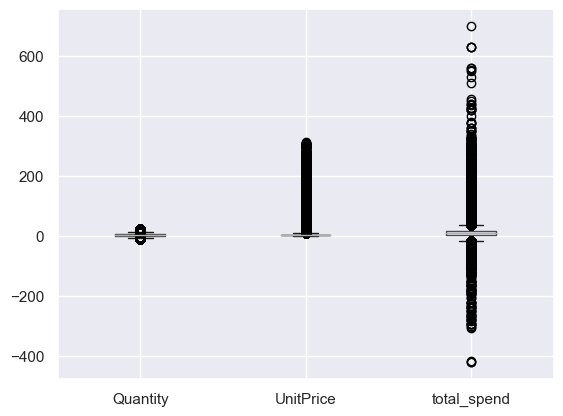

In [10]:
df.drop(columns=['CustomerID']).boxplot()
plt.show()

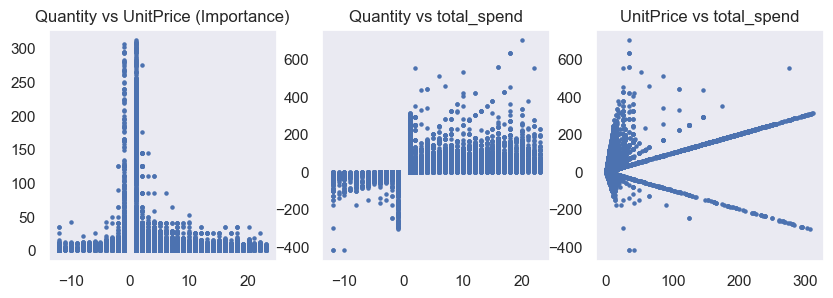

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
ax[0].scatter(x=df['Quantity'], y=df['UnitPrice'], s=5)
ax[0].title.set_text('Quantity vs UnitPrice (Importance)')
ax[1].scatter(x=df['Quantity'], y=df['total_spend'], s=5)
ax[1].title.set_text('Quantity vs total_spend')
ax[2].scatter(x=df['UnitPrice'], y=df['total_spend'], s=5)
ax[2].title.set_text('UnitPrice vs total_spend')
plt.show()

## Step 2: ML

### Anomaly Detection with Isolation Forest

In [15]:
# from sklearn.ensemble import IsolationForest
# X = sample[['Quantity', 'UnitPrice', 'total_spend']]
# if_detector = IsolationForest(n_estimators=100, contamination=0.0001).fit(X)
# if_detect = if_detector.predict(X)

In [16]:
# color_map = {1: 'royalblue', -1: 'crimson'}

In [17]:
# fig, ax = plt.subplots(1, 3, figsize=(10, 3))
# ax[0].scatter(x=df['Quantity'], y=df['UnitPrice'], s=5, c=pd.Series(if_detect).map(color_map))
# ax[0].title.set_text('Quantity vs UnitPrice (Importance)')
# ax[1].scatter(x=df['Quantity'], y=df['total_spend'], s=5, c=pd.Series(if_detect).map(color_map))
# ax[1].title.set_text('Quantity vs total_spend')
# ax[2].scatter(x=df['UnitPrice'], y=df['total_spend'], s=5, c=pd.Series(if_detect).map(color_map))
# ax[2].title.set_text('UnitPrice vs total_spend')
# plt.show()

### Customer Segmentation by RFM

- R: Recency - diff date of the most recent purchase for each customer
- F: Frequency - total number of purchases for each customer
- M: Monetary - total money spent by each customer
- etc. should be included

In [12]:
sample = df.copy()
anonymous_customer_index = sample[sample['CustomerID'] == 0].index
sample = sample.drop(index=anonymous_customer_index)
sample.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [13]:
freq = sample.groupby(['CustomerID'])['InvoiceNo'].nunique().reset_index().rename({'InvoiceNo': 'frequency'}, axis=1)
# sample[sample['CustomerID'] == 12349].groupby("CustomerID")['InvoiceNo'].value_counts()
freq.head()

,CustomerID,frequency
0,12347,7
1,12348,4
2,12349,1
3,12350,1
4,12352,10


In [14]:
monetary = sample.groupby('CustomerID')["total_spend"].sum().reset_index().rename({'total_spend': 'monetary'}, axis=1)
monetary.head()

,CustomerID,monetary
0,12347,3097.82
1,12348,377.00
2,12349,1626.15
3,12350,314.00
4,12352,1545.41


commented lines are used for testing and inspecting the processes

In [15]:
# sample[['CustomerID', 'InvoiceNo', 'InvoiceDate']].drop_duplicates('InvoiceNo').loc[sample['CustomerID'] == 18283]
# sample.loc[sample['CustomerID'] == 18283].groupby('CustomerID')['InvoiceNo'].value_counts()
# sample.groupby('CustomerID')['InvoiceNo'].nunique()

# unique_invoice = unique invoice both No. and Date
unique_invoice = sample[['CustomerID', 'InvoiceNo', 'InvoiceDate']].drop_duplicates(['InvoiceNo'])
unique_invoice['recency'] = unique_invoice.groupby('CustomerID')['InvoiceDate'].diff().dt.days
# unique_invoice
# unique_invoice.loc[unique_invoice['CustomerID'] == 15804]
# unique_invoice.loc[unique_invoice['CustomerID'] == 17850]

# latest_index = unique_invoice.groupby(['CustomerID'])['InvoiceDate'].max().index
# unique_invoice.iloc[latest_index, :]
# recency = unique_invoice.iloc[latest_index, :][['CustomerID', 'recency']]
recency = unique_invoice.drop_duplicates("CustomerID", keep='last')
# NaN occured for one time purchase
# sample.loc[sample['CustomerID'] == 17301]['InvoiceDate'].nunique()
recency = recency.drop(columns=['InvoiceNo', 'InvoiceDate'])
pd.options.mode.chained_assignment = None  # default='warn'
recency.loc[recency['recency'].isnull() , 'one_time_purchase'] = int(1)
recency['one_time_purchase'] = recency['one_time_purchase'].fillna(0)
recency['one_time_purchase'] = recency['one_time_purchase'].astype(int)
recency['recency'] = recency['recency'].fillna(999)
recency['recency'] = recency['recency'].astype(int)
recency.head()

,CustomerID,recency,one_time_purchase
125,18074,999,1
185,13747,999,1
300,12791,999,1
380,17908,999,1
580,16583,999,1


In [16]:
unique_invoice.head()

,CustomerID,InvoiceNo,InvoiceDate,recency
0,17850,536365,2010-12-01 08:26:00,NaN
7,17850,536366,2010-12-01 08:28:00,0.0
9,13047,536367,2010-12-01 08:34:00,NaN
20,13047,536368,2010-12-01 08:34:00,0.0
24,13047,536369,2010-12-01 08:35:00,0.0


In [17]:
customer_profile = recency.merge(freq, on='CustomerID').merge(monetary, on='CustomerID')
# customer_profile = pd.merge(freq, monetary, how='left', on='CustomerID')
# customer_profile = pd.merge(customer_profile, recency, how='left', on='CustomerID')
customer_profile.head()

,CustomerID,recency,one_time_purchase,frequency,monetary
0,18074,999,1,1,298.40
1,13747,999,1,1,79.60
2,12791,999,1,1,15.00
3,17908,999,1,1,234.52
4,16583,999,1,1,233.45


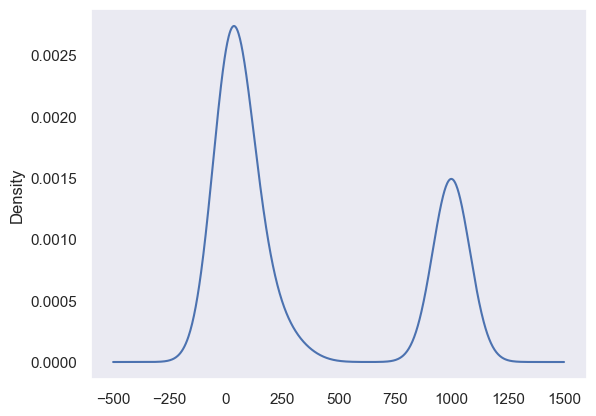

           recency  one_time_purchase    frequency      monetary
count  4248.000000        4248.000000  4248.000000   4248.000000
mean    348.568738           0.307910     4.765772   1050.577871
std     438.150385           0.461683     8.578505   2332.284637
min       0.000000           0.000000     1.000000   -284.590000
25%      15.000000           0.000000     1.000000    209.047500
50%      73.000000           0.000000     2.000000    487.360000
75%     999.000000           1.000000     5.000000   1142.312500
max     999.000000           1.000000   239.000000  92507.870000


In [18]:
customer_profile['recency'].plot(kind='kde')
plt.show()
print(customer_profile.drop(columns=['CustomerID']).describe())

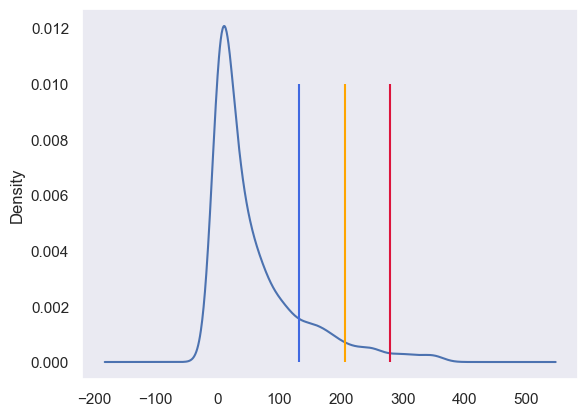

         CustomerID      recency  one_time_purchase    frequency      monetary
count   2940.000000  2940.000000             2940.0  2940.000000   2940.000000
mean   15280.754762    59.193197                0.0     6.441156   1411.430055
std     1719.735929    73.244858                0.0     9.860180   2722.224064
min    12347.000000     0.000000                0.0     2.000000   -255.000000
25%    13809.500000     8.000000                0.0     2.000000    392.385000
50%    15240.500000    30.000000                0.0     4.000000    777.970000
75%    16777.250000    82.000000                0.0     7.000000   1610.607500
max    18287.000000   365.000000                0.0   239.000000  92507.870000


In [19]:
def_churn = customer_profile.loc[customer_profile['recency'] == 999]
unsure_churn = customer_profile.loc[customer_profile['recency'] != 999]
unsure_churn['recency'].plot(kind='kde')
plt.vlines(x=unsure_churn['recency'].mean()+1*(unsure_churn['recency'].std()), ymin=0, ymax=0.01, color='royalblue')
plt.vlines(x=unsure_churn['recency'].mean()+2*(unsure_churn['recency'].std()), ymin=0, ymax=0.01, color='orange')
plt.vlines(x=unsure_churn['recency'].mean()+3*(unsure_churn['recency'].std()), ymin=0, ymax=0.01, color='crimson')
plt.show()
print(unsure_churn.describe())

To decide cut-off value considering customers as churn or almost to churn, I personally think it depends on the cost of losing a customer and the cost of retaining a customer. We will discuss this later in churn prediction part.

More Feature Engineering to customer_profile
- mean time between purchases
- mean ticket size (AVG spent per trasaction)
- mean total unique item per purchase
- mean total quantity per purchase
- mean spent per month
- freq per month
- refund times

In [20]:
# mean time interval between purchases
mean_time_interval = unique_invoice.groupby('CustomerID').agg({"recency": lambda x: x.diff().abs().mean()}).reset_index()
mean_time_interval = mean_time_interval.rename(columns={'recency': 'mean_time_interval'})
mean_time_interval['mean_time_interval'] = mean_time_interval['mean_time_interval'].apply(lambda x: round(x, 2))
mean_time_interval['mean_time_interval'] = mean_time_interval['mean_time_interval'].fillna(999)
mean_time_interval.head()

,CustomerID,mean_time_interval
0,12347,25.60
1,12348,67.00
2,12349,999.00
3,12350,999.00
4,12352,53.25


In [21]:
mean_per_purchase = sample.groupby(['CustomerID', 'InvoiceNo'])\
                              .agg({"total_spend": "sum", # aggregate some for each InvoiceNo and CustomerID
                                  "Quantity": "sum",
                                  "StockCode": "nunique"})\
                              .groupby('CustomerID')\
                              .agg({"total_spend": "mean", # aggregate mean for each CustomerID
                                  "Quantity": "mean",
                                  "StockCode": "mean"})\
                              .reset_index()\
                              .rename(columns={'total_spend': 'mean_ticket_size',
                                             "Quantity": "mean_quantity",
                                             "StockCode": "mean_unique_item"})\
                              .round(2)
mean_per_purchase.head()

,CustomerID,mean_ticket_size,mean_quantity,mean_unique_item
0,12347,442.55,185.71,21.00
1,12348,94.25,7.25,1.25
2,12349,1626.15,485.00,68.00
3,12350,314.00,173.00,16.00
4,12352,154.54,47.00,9.10


In [22]:
per_period = sample[['CustomerID', 'InvoiceNo', 'StockCode', 'InvoiceDate', 'total_spend']]
per_period['month'] = per_period['InvoiceDate'].dt.month
# per_period['week'] = per_period['InvoiceDate'].dt.isocalendar().week

per_month = per_period.groupby(['CustomerID', 'month'])\
                        .agg({"InvoiceNo": "nunique", "total_spend": "mean"})\
                        .groupby(['CustomerID'])\
                        .agg({"InvoiceNo": "mean", "total_spend": "mean"})\
                        .round(2)\
                        .reset_index()\
                        .rename(columns={'InvoiceNo': 'freq_per_month', 'total_spend': 'mean_spent_per_month'})

per_month.head()

,CustomerID,freq_per_month,mean_spent_per_month
0,12347,1.17,20.91
1,12348,1.00,87.12
2,12349,1.00,23.91
3,12350,1.00,19.62
4,12352,2.50,17.54


integrate features

In [23]:
rfm = customer_profile.merge(mean_time_interval, on='CustomerID')\
                        .merge(mean_per_purchase, on='CustomerID')\
                        .merge(per_month, on='CustomerID')
print(rfm.describe())
rfm.head()

         CustomerID      recency  one_time_purchase    frequency  \
count   4248.000000  4248.000000        4248.000000  4248.000000   
mean   15295.840160   348.568738           0.307910     4.765772   
std     1722.203054   438.150385           0.461683     8.578505   
min    12347.000000     0.000000           0.000000     1.000000   
25%    13808.750000    15.000000           0.000000     1.000000   
50%    15296.500000    73.000000           0.000000     2.000000   
75%    16777.250000   999.000000           1.000000     5.000000   
max    18287.000000   999.000000           1.000000   239.000000   

           monetary  mean_time_interval  mean_ticket_size  mean_quantity  \
count   4248.000000         4248.000000       4248.000000    4248.000000   
mean    1050.577871          528.908748        226.173661      98.411648   
std     2332.284637          474.035555        193.525002      82.294686   
min     -284.590000            0.000000       -284.590000    -133.000000   
25%    

,CustomerID,recency,one_time_purchase,frequency,monetary,mean_time_interval,mean_ticket_size,mean_quantity,mean_unique_item,freq_per_month,mean_spent_per_month
0,18074,999,1,1,298.40,999.0,298.40,62.0,10.0,1.0,29.84
1,13747,999,1,1,79.60,999.0,79.60,8.0,1.0,1.0,79.60
2,12791,999,1,1,15.00,999.0,15.00,1.0,1.0,1.0,15.00
3,17908,999,1,1,234.52,999.0,234.52,121.0,49.0,1.0,4.19
4,16583,999,1,1,233.45,999.0,233.45,111.0,14.0,1.0,16.68


Kmeans

check outliers

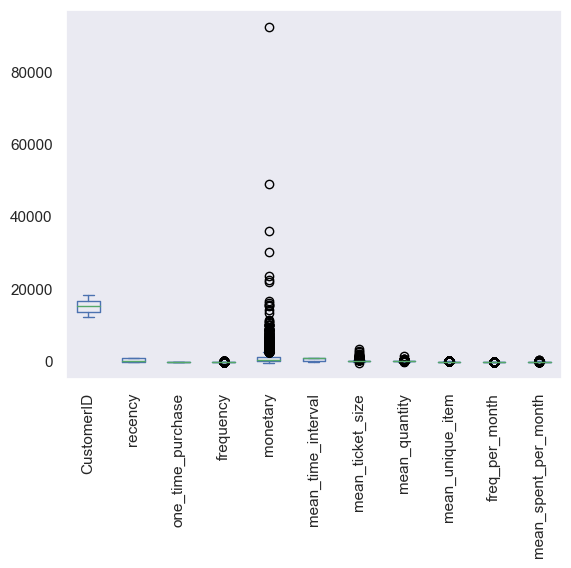

In [24]:
rfm.plot(kind='box')
plt.xticks(rotation=90)
plt.show()

choose k

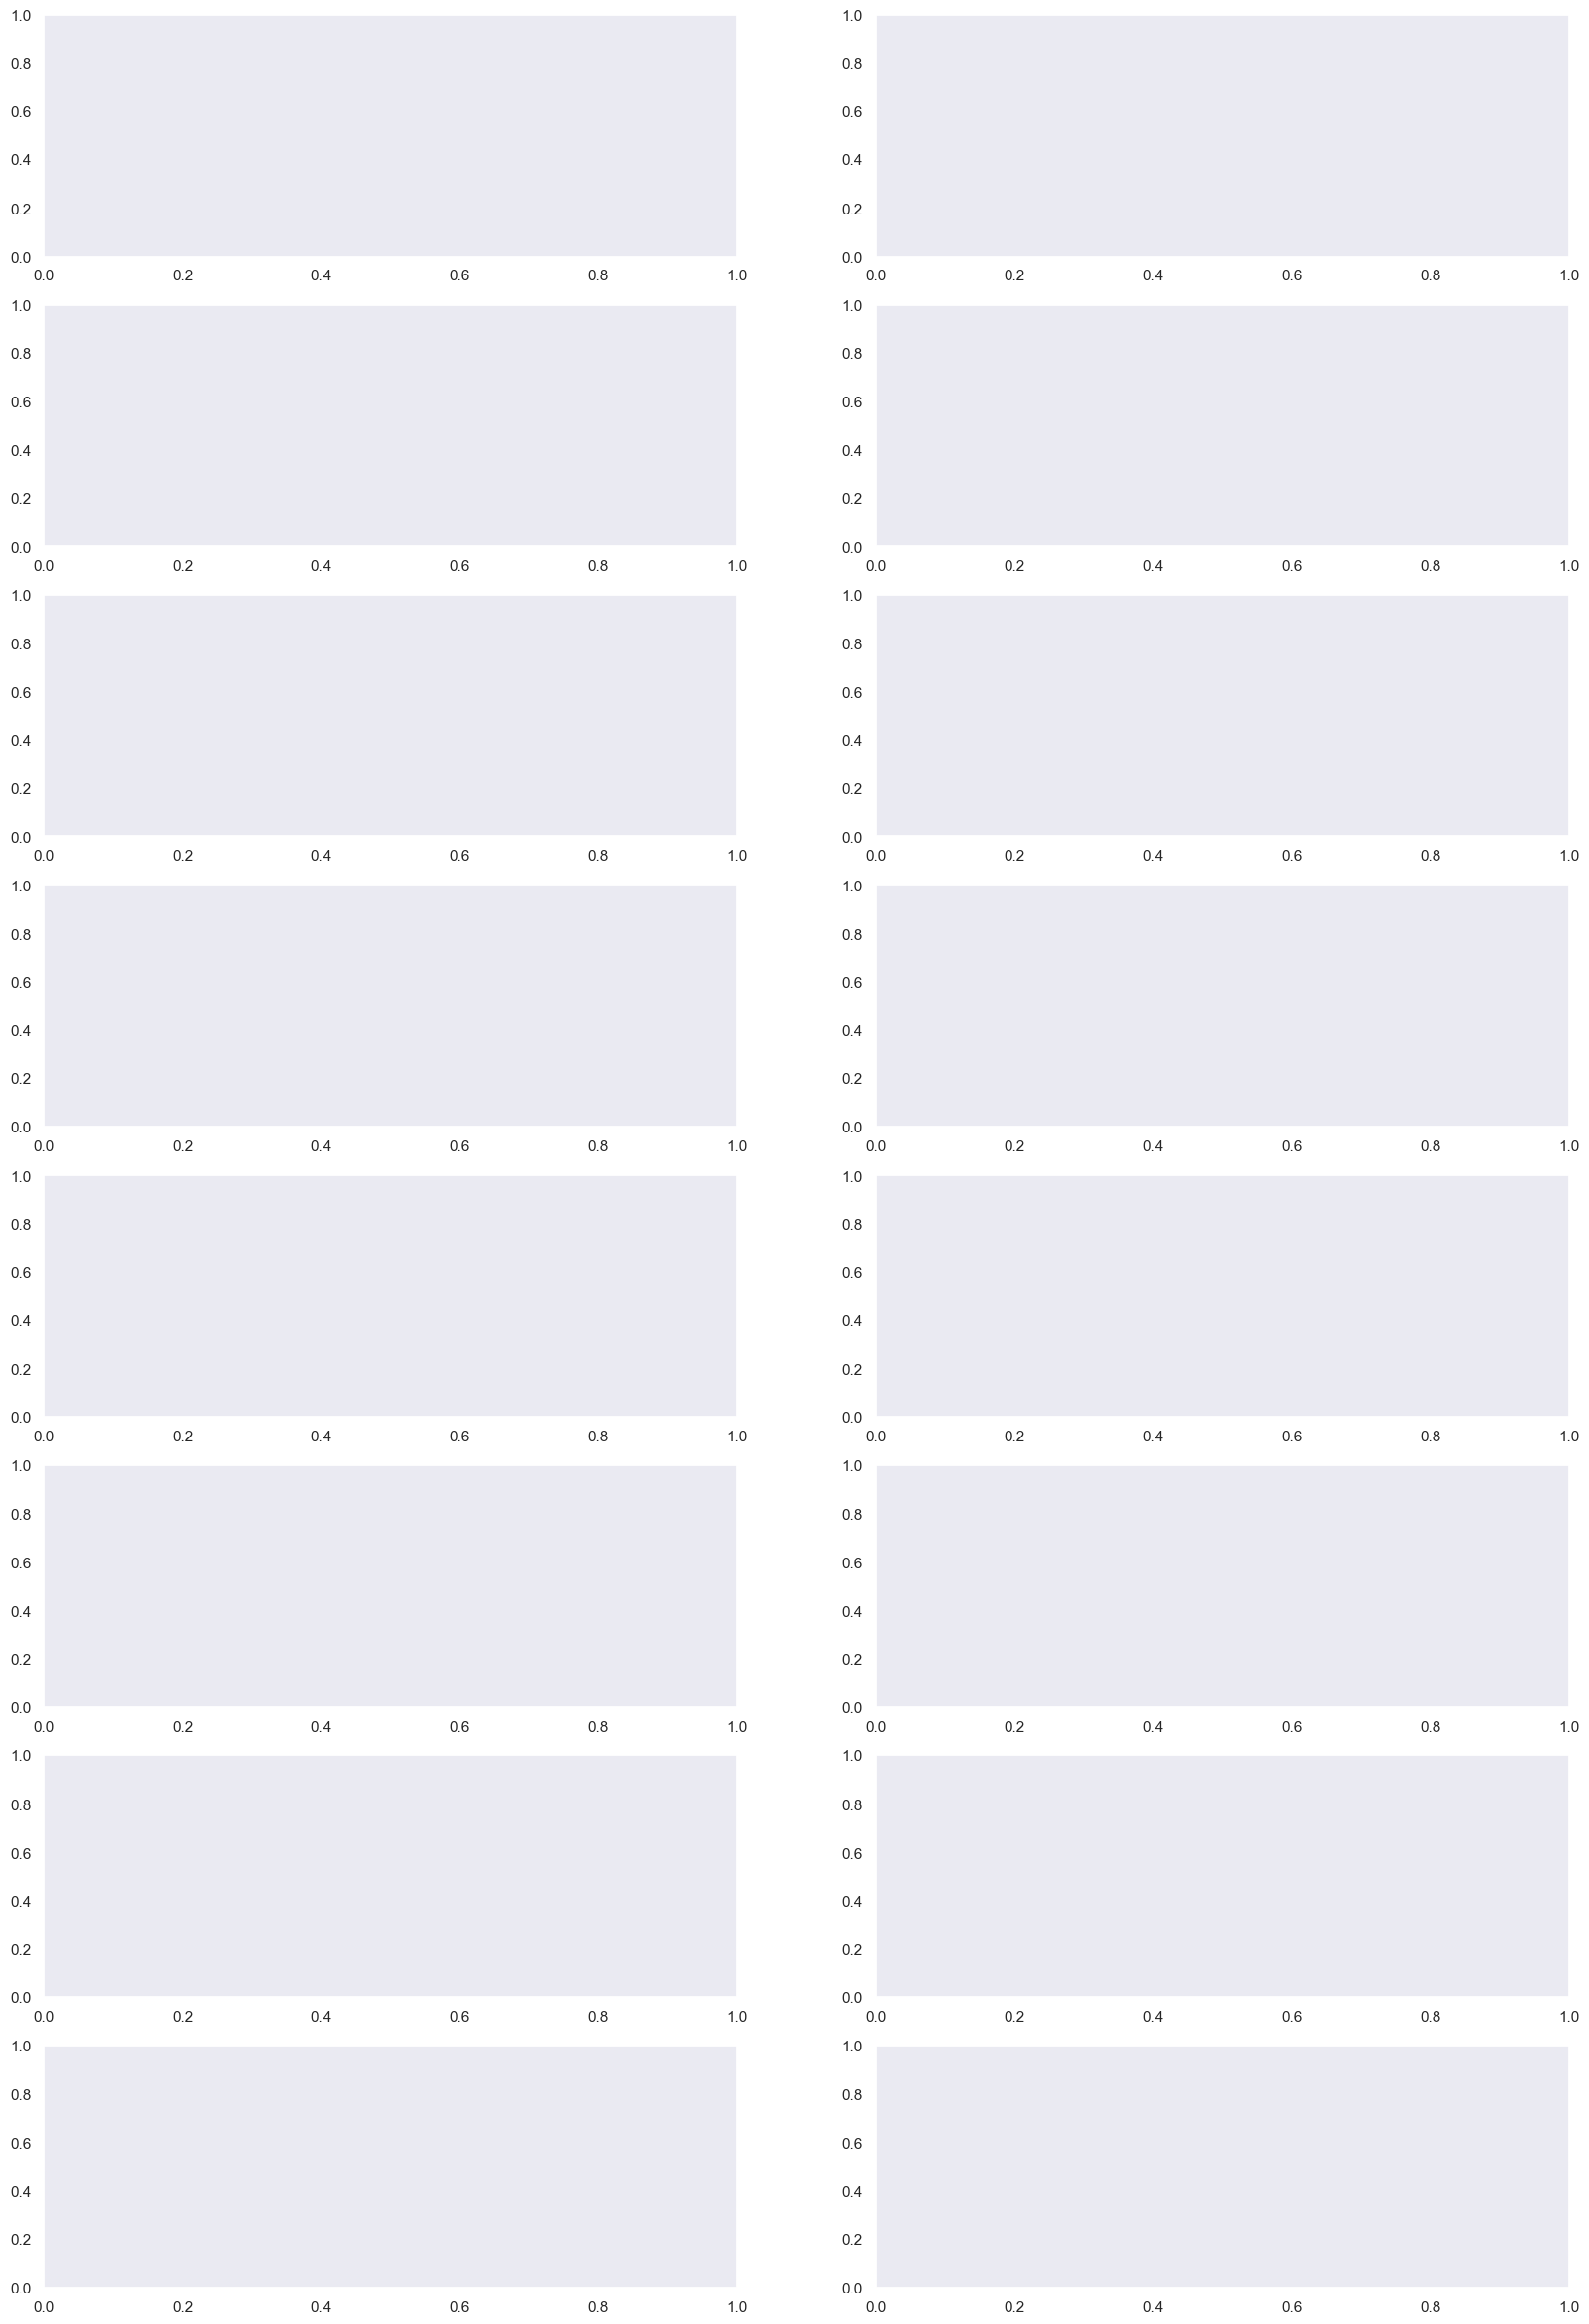

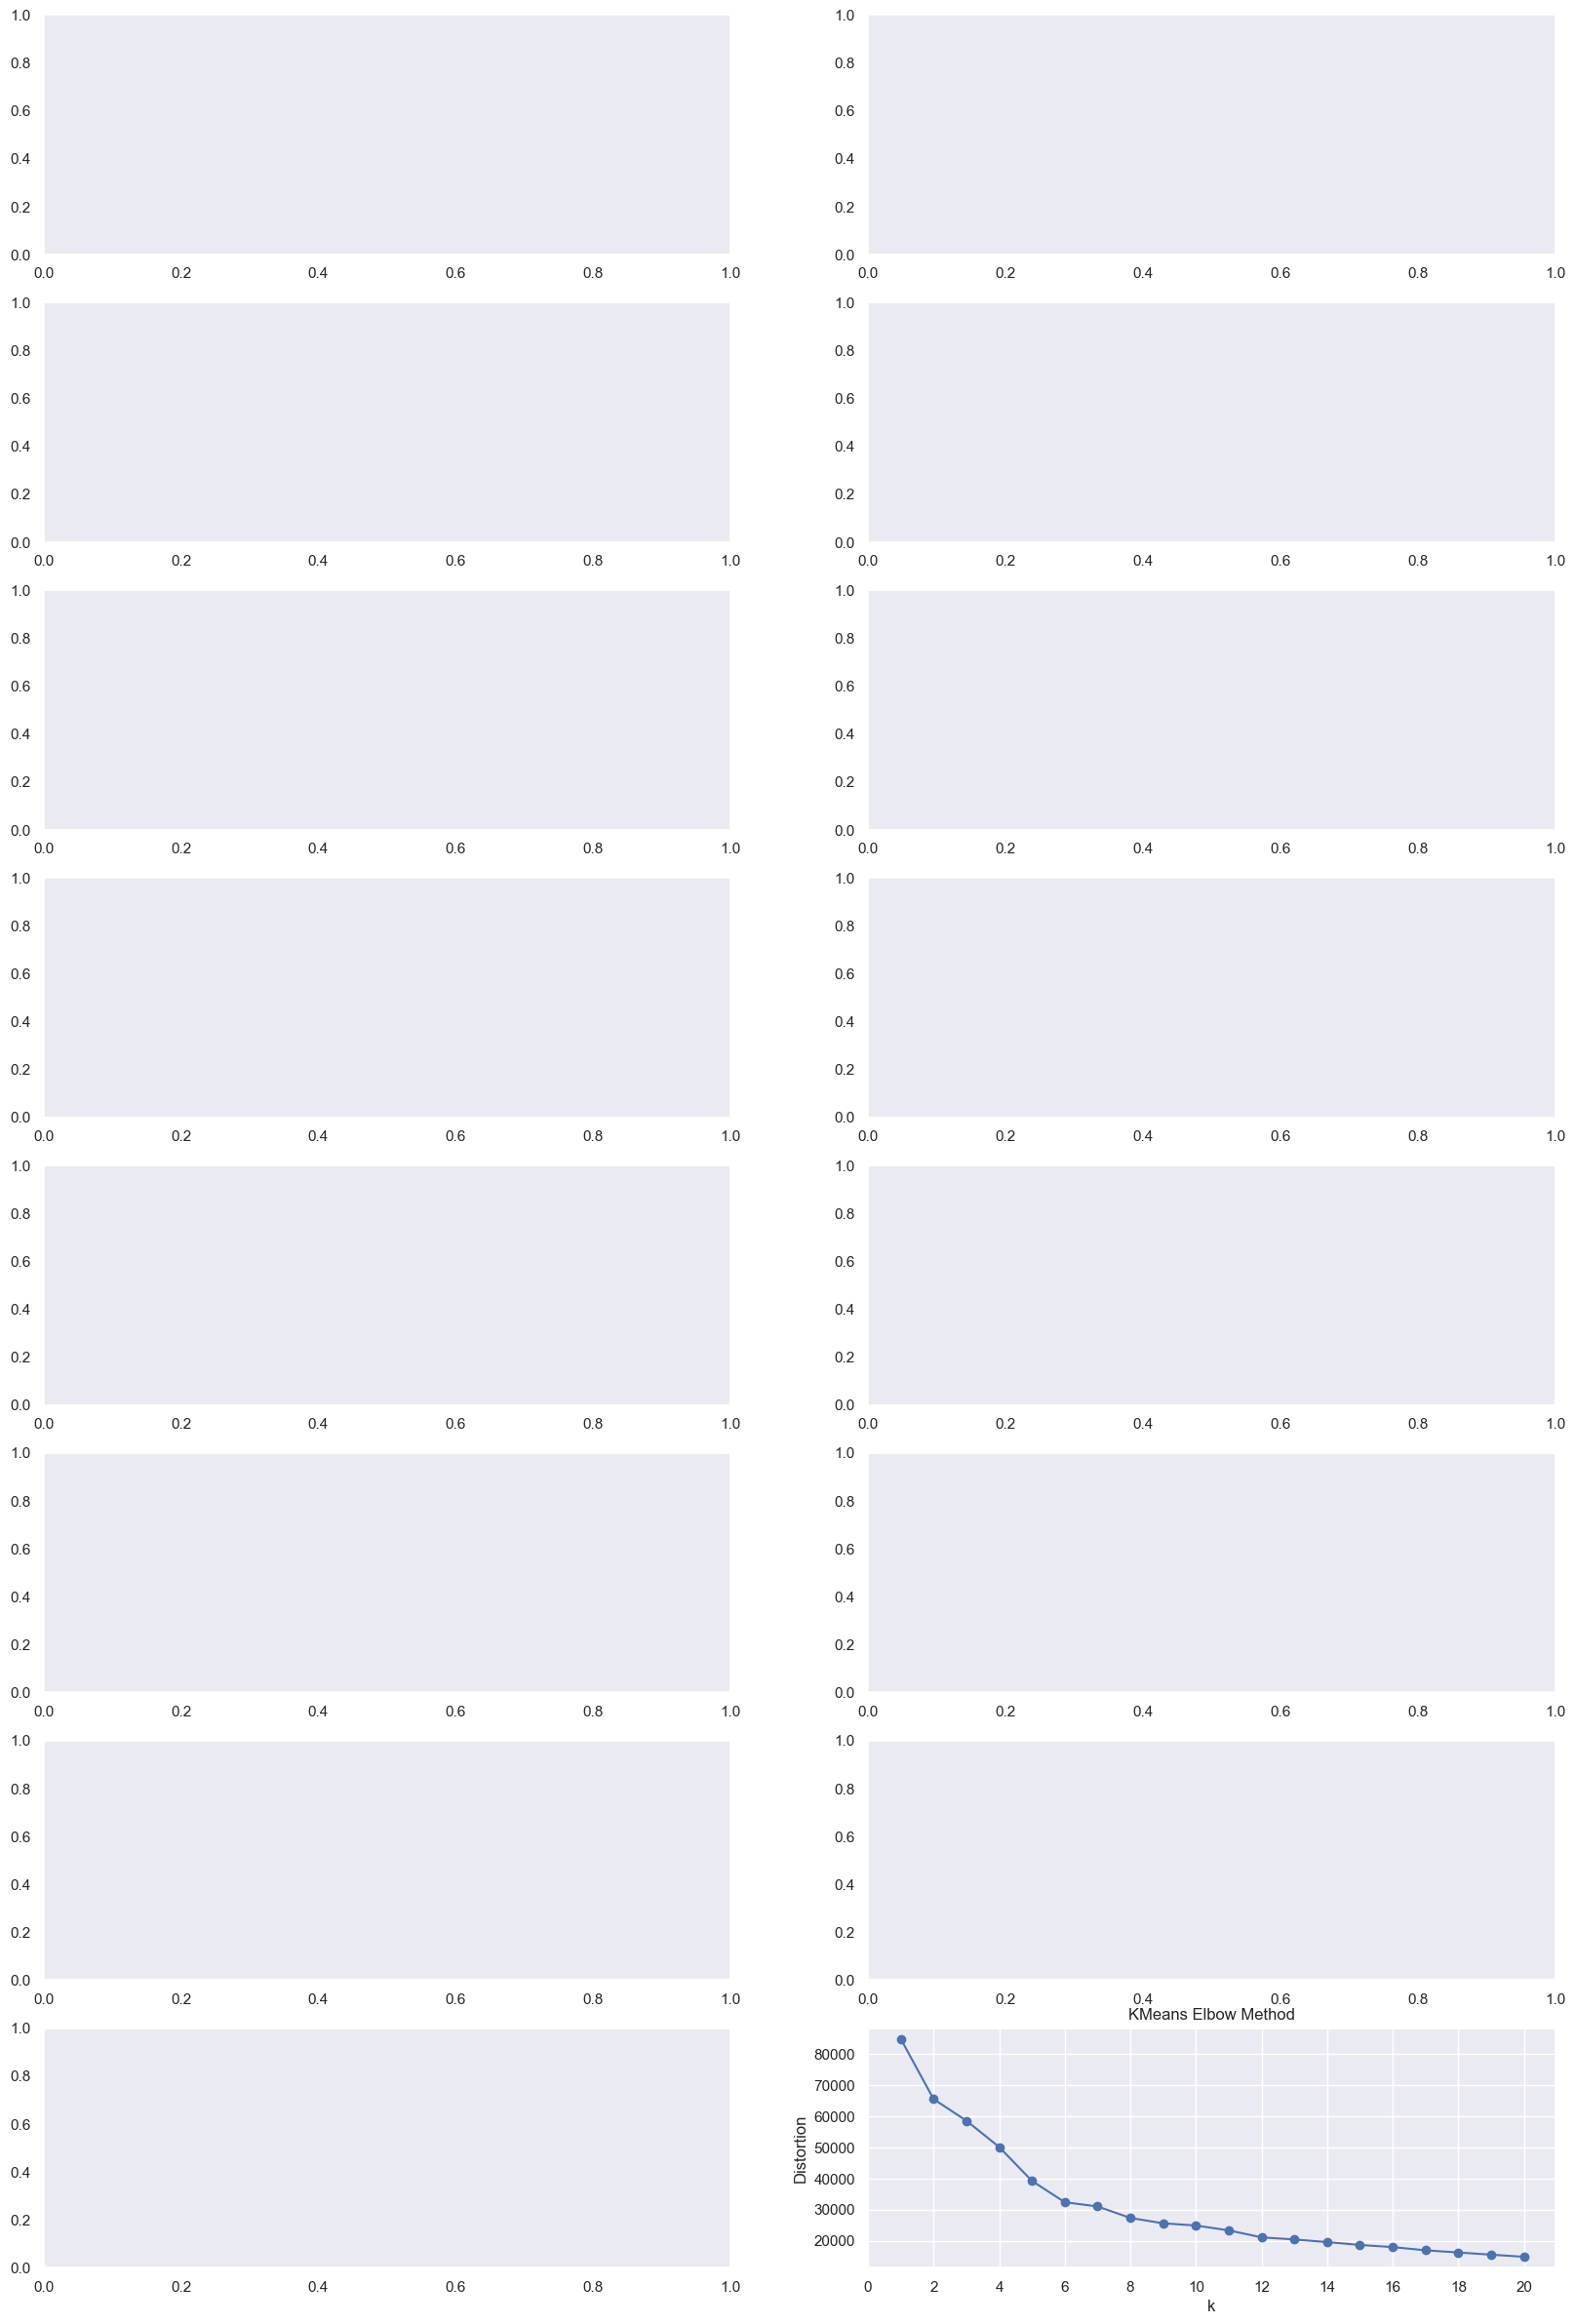

In [43]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
rfm_scaled = scaler.fit_transform(rfm.drop(columns=['CustomerID']))
rfm_scaled = pd.DataFrame(rfm_scaled, columns=rfm.drop(columns=['CustomerID']).columns)
# rfm_scaled['CustomerID'] = rfm['CustomerID']
rfm_scaled.head()

from sklearn.cluster import KMeans

distortion = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init='auto', random_state=0)
    kmeans.fit(rfm_scaled)
    distortion.append(kmeans.inertia_)
plt.plot(range(1, 21), distortion, marker='o')
plt.xticks(range(0, 22, 2))
plt.grid()
plt.title("KMeans Elbow Method")
plt.ylabel("Distortion")
plt.xlabel("k")
plt.show()

choose k with silhouette score

For k = 4, The average silhouette_score is : 0.40243021667212225
For k = 6, The average silhouette_score is : 0.3814337009117342
For k = 8, The average silhouette_score is : 0.2718169236366947
For k = 11, The average silhouette_score is : 0.2591130058735722


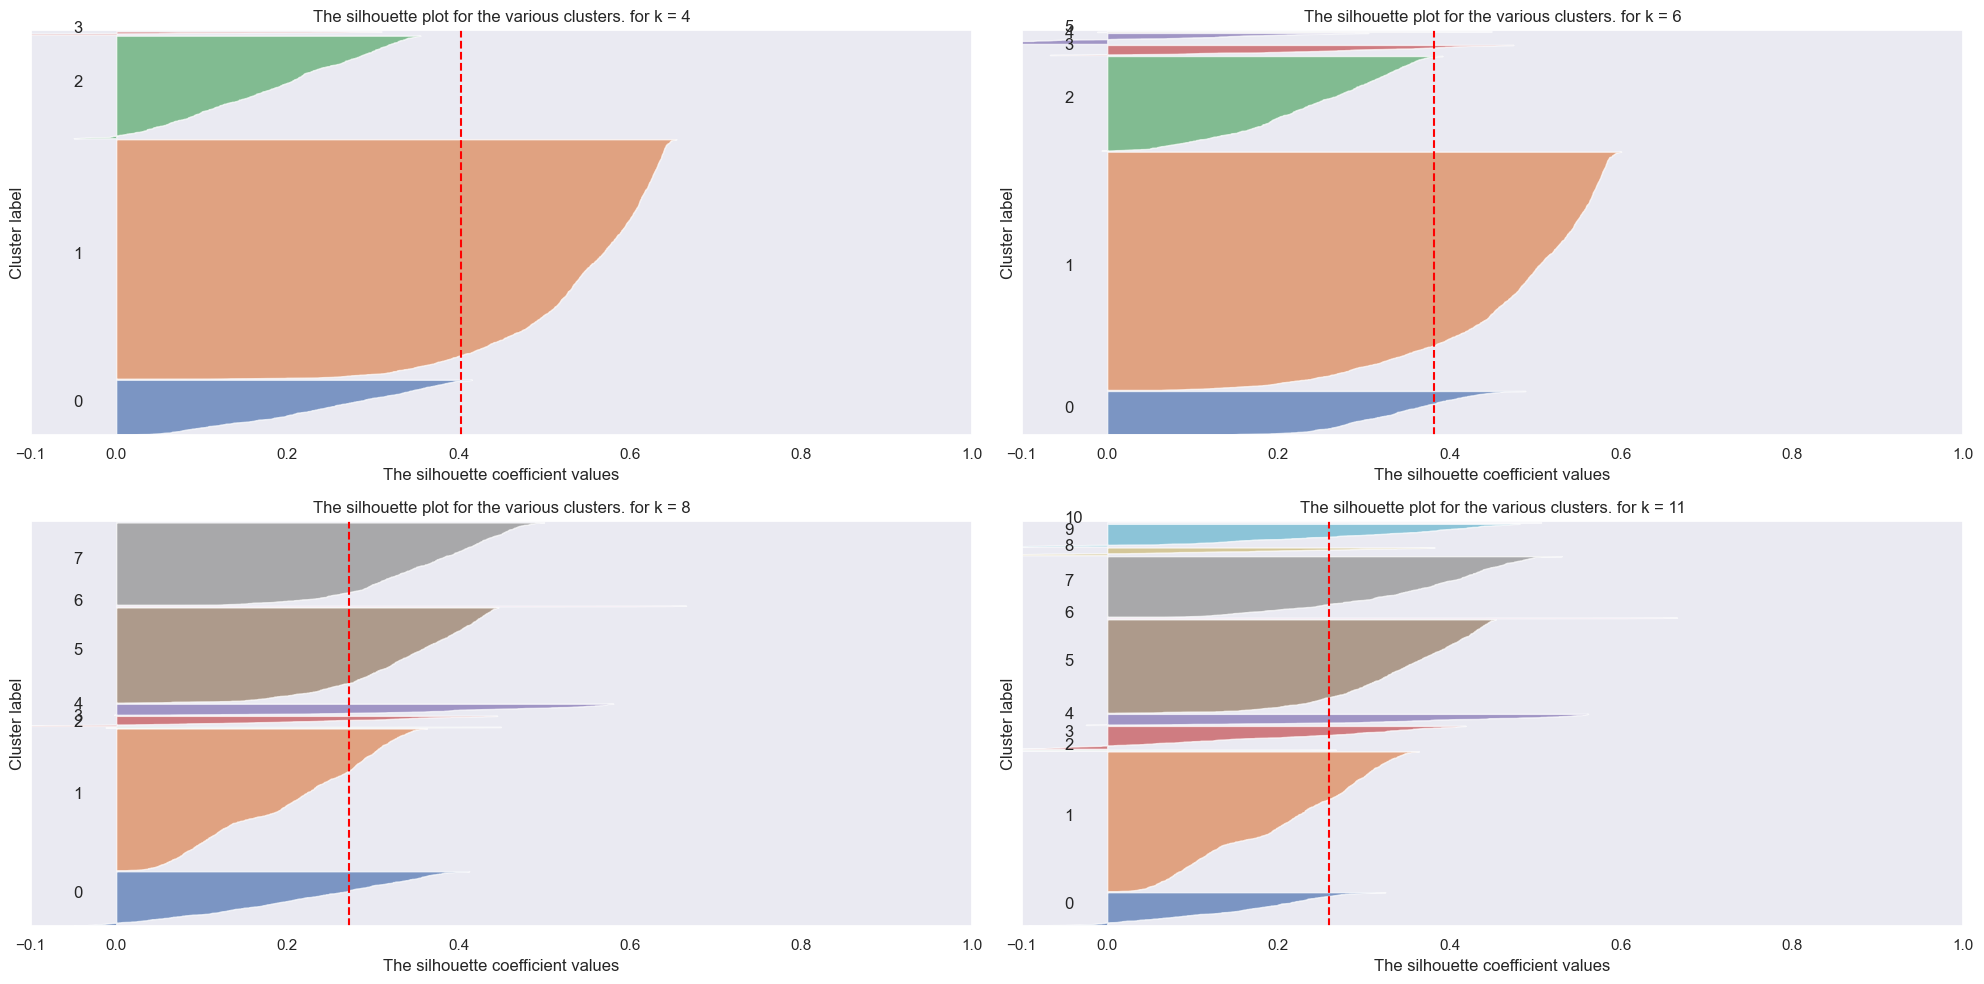

In [44]:
from sklearn.metrics import silhouette_score, silhouette_samples

K = [4, 6, 8, 11]

# Create a subplot with 3 row and 2 columns
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(20, 10)

for k, each_plot in zip(K, ax.flatten()):
    each_plot.set_xlim([-0.1, 1])
    # The (k+1)*10 is for inserting blank space between silhouette
    each_plot.set_ylim([0, len(rfm_scaled) + (k + 1) * 10])

    # Initialize the clusterer with k value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=k, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(rfm_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(rfm_scaled, cluster_labels)
    print(f"For k = {k}, The average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(rfm_scaled, cluster_labels)

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        each_plot.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        each_plot.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    each_plot.set_title(f"The silhouette plot for the various clusters. for k = {k}")
    each_plot.set_xlabel("The silhouette coefficient values")
    each_plot.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    each_plot.axvline(x=silhouette_avg, color="red", linestyle="--")

    each_plot.set_yticks([])  # Clear the yaxis labels / ticks
    each_plot.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
# adjust layout
fig.tight_layout()
plt.show()

from both plots, k=8 and 11 are the best. we're gonna choose 8, because when k=11, there are some clusters with only 1 or 2 customers.

even choosing more value of k can lead to personalized segmentation, but it also become more difficult to manage and implement.

Let's assign predicted segments back to customer profile.

In [45]:
km = KMeans(n_clusters=8, n_init="auto", init="k-means++", random_state=0).fit(rfm_scaled)
rfm['cluster'] = km.labels_

In [46]:
rfm.head()

,CustomerID,recency,one_time_purchase,frequency,monetary,mean_time_interval,mean_ticket_size,mean_quantity,mean_unique_item,freq_per_month,mean_spent_per_month,cluster
0,18074,999,1,1,298.40,999.0,298.40,62.0,10.0,1.0,29.84,2
1,13747,999,1,1,79.60,999.0,79.60,8.0,1.0,1.0,79.60,0
2,12791,999,1,1,15.00,999.0,15.00,1.0,1.0,1.0,15.00,2
3,17908,999,1,1,234.52,999.0,234.52,121.0,49.0,1.0,4.19,2
4,16583,999,1,1,233.45,999.0,233.45,111.0,14.0,1.0,16.68,2


In [29]:
rfm['cluster'].value_counts()

4    2542
1     883
6     580
0     120
3     109
7       7
2       6
5       1
Name: cluster, dtype: int64

In [30]:
rfm.loc[rfm['cluster'] == 5]

,CustomerID,recency,one_time_purchase,frequency,monetary,mean_time_interval,mean_ticket_size,mean_quantity,mean_unique_item,freq_per_month,mean_spent_per_month,cluster
4188,14911,1,0,239,92507.87,1.74,387.06,146.34,20.06,19.92,19.0,5


In [31]:
full_rfm = rfm.copy()
rfm = rfm.loc[rfm['cluster'] != 5]

As expected that the customer in segment 5 which has 1 customer is the outlier. This should be removed to reduce chance of overfitting in the next steps, and we should remove this customer before we cluster the customers, so we can evaluate more effectively.

`Run the code above choose k again and reassign the segments to customer profile. and don't remove cluster 5 this time.`

And, this outlier customer in business aspect, should be treated differently from other customers.

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [48]:
X = rfm.drop(columns=['cluster', 'CustomerID'])
y = rfm['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = DecisionTreeClassifier()
params_dist = {
    "criterion": ["gini", "entropy"],
    "max_depth": [4, 5],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [1, 2, 3]
}

search = RandomizedSearchCV(
    model,
    param_distributions=params_dist,
    cv=5,
    scoring="accuracy",
    verbose=1,
    random_state=0
)

search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 3, 4]},
                   random_state=0, scoring='accuracy', verbose=1)

In [49]:
print(search.best_params_)
tuned_model = DecisionTreeClassifier(**search.best_params_, random_state=0)
tuned_model.fit(X_train, y_train)

{'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'entropy'}


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=4,
                       random_state=0)

In [50]:
prediction = tuned_model.predict(X_test)
train_prediction = tuned_model.predict(X_train)
print(f"Accuracy: {accuracy_score(y_test, prediction).round(4)}")
print(f"Accuracy on train set: {accuracy_score(y_train, train_prediction).round(4)}")
print(f"Classification Report: \n{classification_report(y_test, prediction)}")

Accuracy: 0.9141
Accuracy on train set: 0.9411
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        27
           1       0.86      0.86      0.86       156
           2       0.96      0.94      0.95       524
           3       0.00      0.00      0.00         1
           4       0.80      0.92      0.86       102
           5       0.67      1.00      0.80         2
           6       1.00      0.67      0.80         3
           7       0.89      0.71      0.79        35

    accuracy                           0.91       850
   macro avg       0.76      0.75      0.75       850
weighted avg       0.92      0.91      0.91       850



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

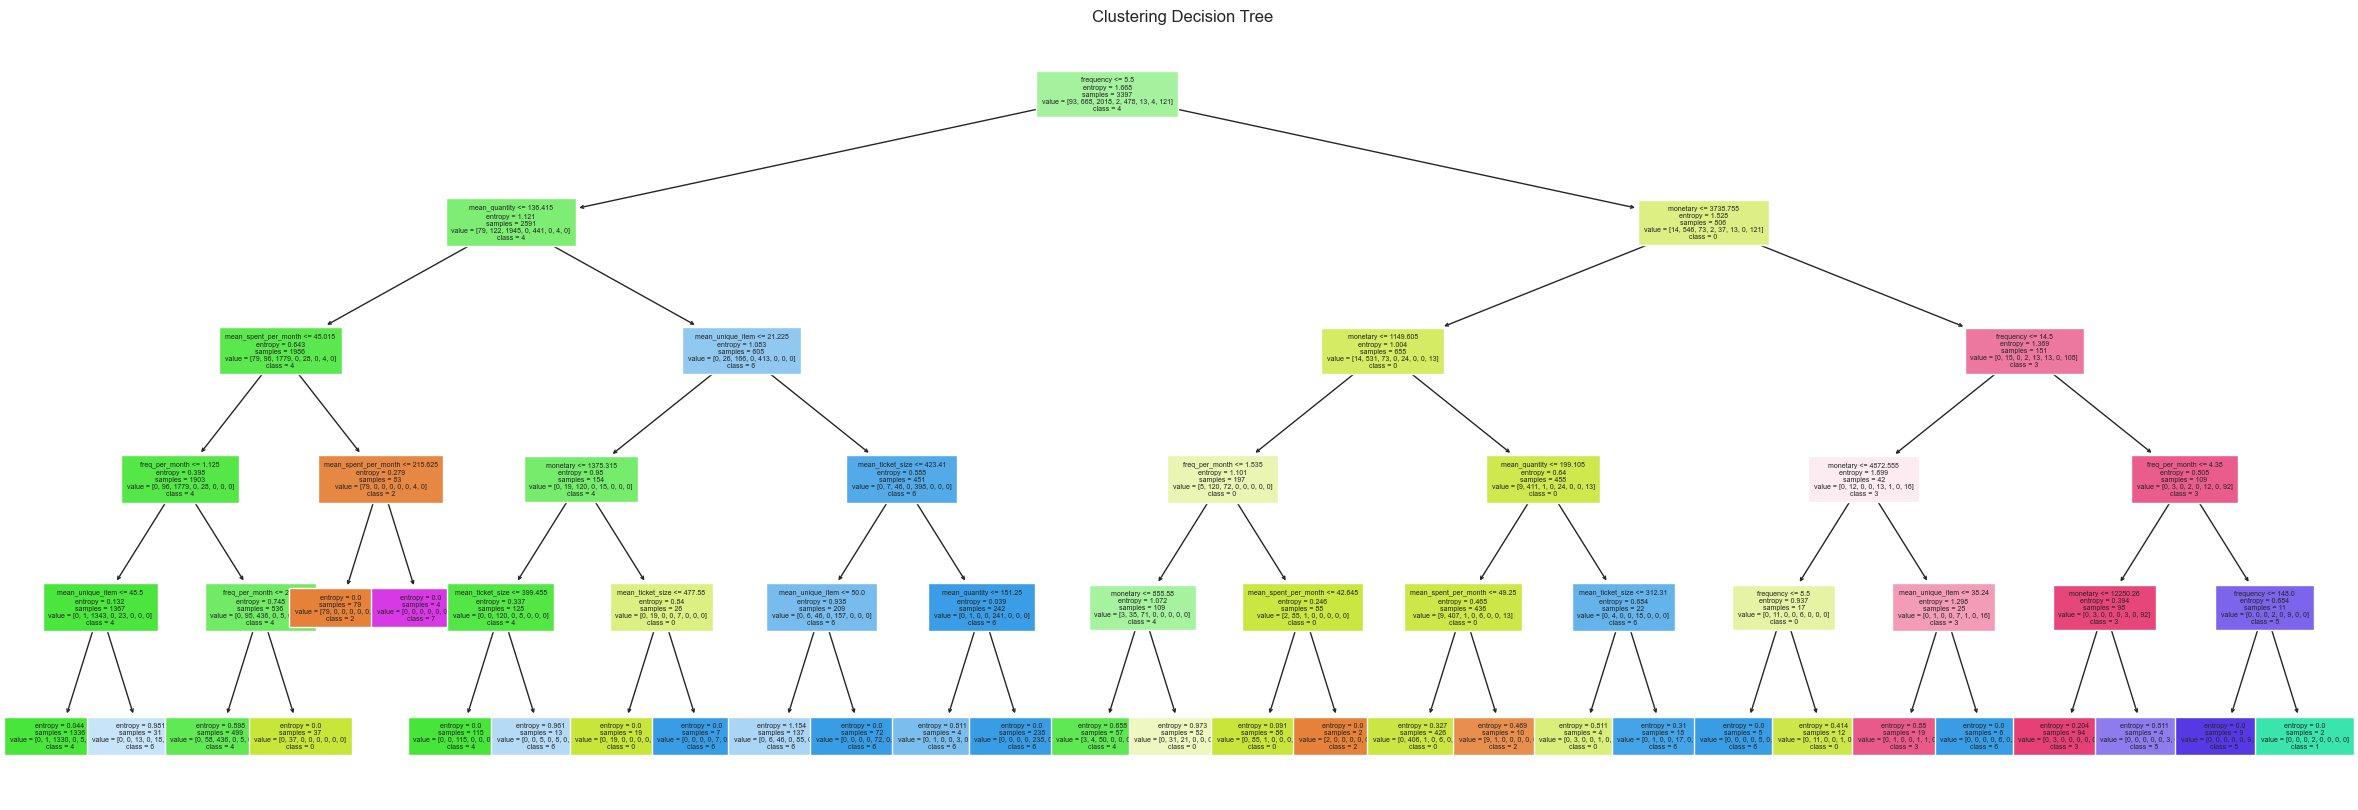

In [51]:
fig = plt.figure(figsize=(30, 10))
plot_tree(tuned_model, 
          filled=True, 
          feature_names=X.columns.tolist(), 
          class_names=y.astype(str).unique(),
          fontsize=5)
plt.title("Clustering Decision Tree")
plt.show()

XGBoost for feature importance for each cluster

In [52]:
from xgboost import XGBClassifier

In [53]:
model_xgb = XGBClassifier()
params_dist = {
    "n_estimators": [100, 200, 300, 400],
    "learning_rate": [0.01, 0.05, 0.1, 0.3],
    "max_depth": [4, 5],
    "min_child_weight": [1, 2, 3],
    "gamma": [0, 0.1, 0.2, 0.3],
    "subsample": [0.5, 0.7, 0.9],
    "colsample_bytree": [0.5, 0.7, 0.9],
    "reg_alpha": [0, 0.1, 0.2, 0.3],
    "reg_lambda": [0, 0.1, 0.2, 0.3]
}

search = RandomizedSearchCV(
    model_xgb,
    param_distributions=params_dist,
    cv=5,
    scoring="accuracy",
    verbose=1,
    random_state=0
)

search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           predictor=None, random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.5, 0.7, 0.9],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.3],
                                        'max_depth': [4, 5],
                                        'min_child_weight': [1, 2, 3],
                                        'n_estimators': [100, 200, 300, 400],
                                        'reg_alpha': [0, 0.1, 0.2, 0.3],
                                        'reg_lambda': [0, 0.1, 0.2, 0.3],
                                        'subsample': [0.5, 0.7, 0.9]},
                   random_state=0, scoring='accuracy', verbose=1)

In [54]:
print(search.best_params_)
tuned_model_xgb = XGBClassifier(**search.best_params_, random_state=0)
tuned_model_xgb.fit(X_train, y_train)

{'subsample': 0.7, 'reg_lambda': 0.2, 'reg_alpha': 0.2, 'n_estimators': 400, 'min_child_weight': 2, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.9}


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.1, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=5, max_leaves=0, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)

In [55]:
prediction = tuned_model_xgb.predict(X_test)
train_prediction = tuned_model_xgb.predict(X_train)
print(f"Accuracy XGB: {accuracy_score(y_test, prediction).round(4)}")
print(f"Accuracy XGB on train set: {accuracy_score(y_train, train_prediction).round(4)}")
print(f"Classification Report XGB: \n{classification_report(y_test, prediction)}")

Accuracy XGB: 0.9776
Accuracy XGB on train set: 1.0
Classification Report XGB: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        27
           1       0.95      0.99      0.97       156
           2       0.99      0.99      0.99       524
           3       0.00      0.00      0.00         1
           4       0.96      0.97      0.97       102
           5       0.67      1.00      0.80         2
           6       1.00      0.33      0.50         3
           7       1.00      0.91      0.96        35

    accuracy                           0.98       850
   macro avg       0.82      0.77      0.77       850
weighted avg       0.98      0.98      0.98       850



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

Using permutation importance to get feature importance for each cluster is another way to find the best rule for each cluster besides using rules from decision tree alone. It's also more reliable than feature importance from XGBoost, and can introduce more generalization approach, especially when the model is overfitting. 

In [56]:
# feature_important = pd.DataFrame(
#     data=tuned_model.feature_importances_,
#     index=tuned_model.feature_names_in_,
#     columns=['importance']
# )
# ax = feature_important.sort_values('importance').plot(kind='barh', 
#                                                       title='Feature Importance', color='mediumblue')
# ax.bar_label(ax.containers[0], fmt="%.03f")
# ax.legend(loc='lower right')
# plt.show()

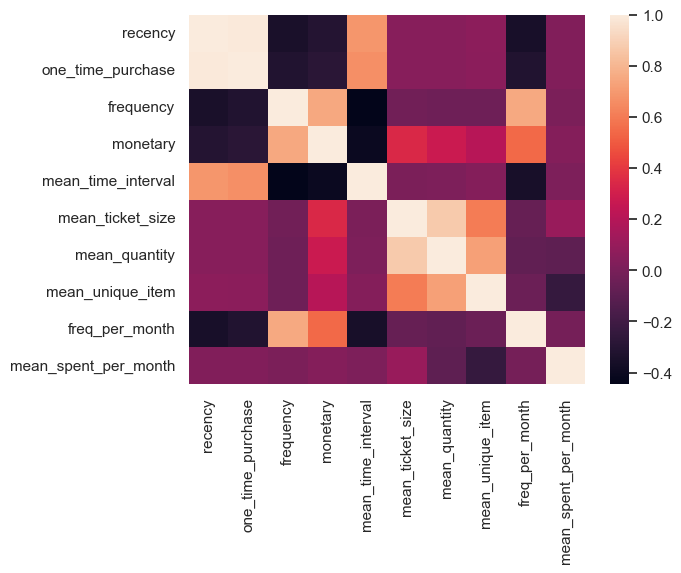

In [57]:
sns.heatmap(X.corr())
plt.show()

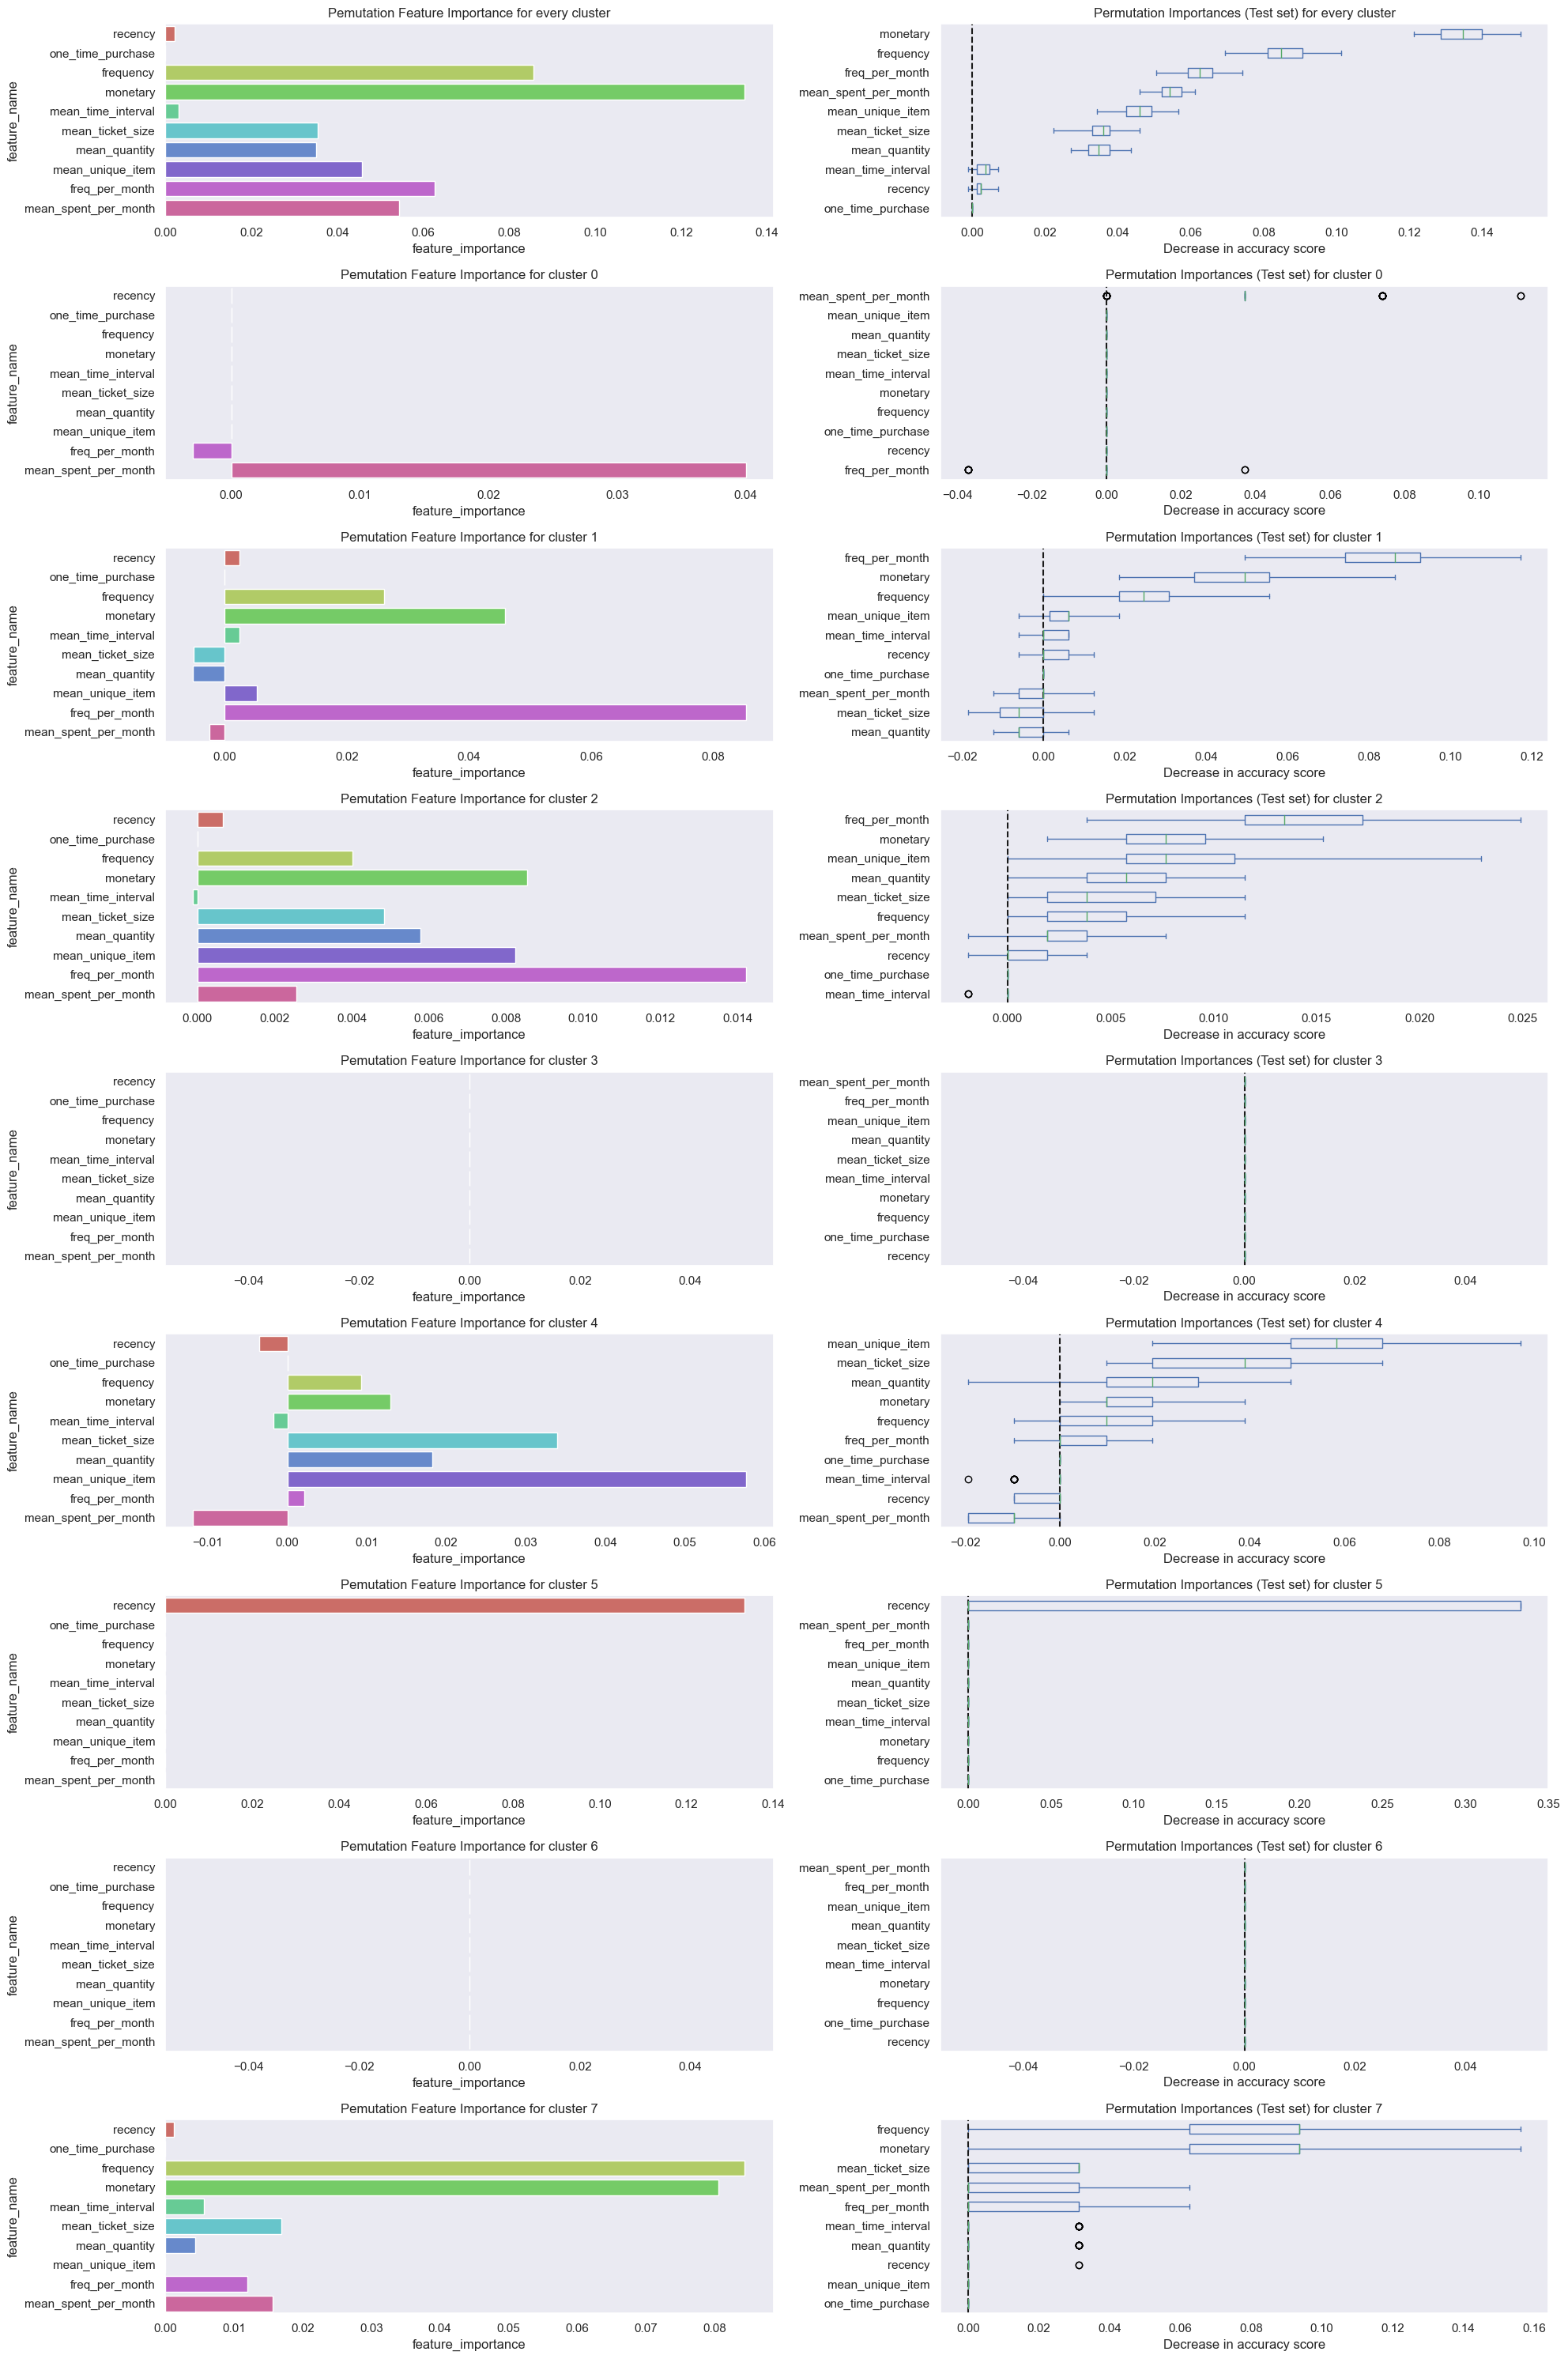

In [69]:
from sklearn.inspection import permutation_importance

# def plot_feature_importances(model, x, y, title, repeat_n):
#     result = permutation_importance(model, x, y, n_repeats=repeat_n, random_state=0)
#     df = pd.DataFrame({'feature_name': x.columns, 'feature_importance': result.importances_mean})
#     plt.figure(figsize=(8, 2))
#     sns.barplot(data=df, x='feature_importance', y='feature_name', palette='hls')
#     plt.title(title)
#     plt.show()

# def plot_decrease_accuracy(model, x, y, title, repeat_n):
#     result = permutation_importance(model, x, y, n_repeats=repeat_n, random_state=0)
#     sorted_importances_idx = result.importances_mean.argsort()
#     importances = pd.DataFrame(
#         result.importances[sorted_importances_idx].T,
#         columns=X.columns[sorted_importances_idx],
#     )
#     ax = importances.plot.box(vert=False, whis=10)
#     ax.set_title(title)
#     ax.axvline(x=0, color="k", linestyle="--")
#     ax.set_xlabel("Decrease in accuracy score")
#     ax.figure.tight_layout()
#     plt.show()

# for i in range(y.nunique()):
#     plot_feature_importances(tuned_model_xgb, X_test.loc[y_test == i], y_test.loc[y_test == i], f'Feature Importance for cluster {i}', 50)
#     plot_decrease_accuracy(tuned_model_xgb, X_test.loc[y_test == i], y_test.loc[y_test == i], f'Permutation Importances (Test set) for cluster {i}', 50)

def plot_feature_importances(result, cluster_profile, title, ax_plot):
    df = pd.DataFrame({'feature_name': cluster_profile.columns, 'feature_importance': result.importances_mean})
    sns.barplot(data=df, x='feature_importance', y='feature_name', palette='hls', ax=ax_plot)
    ax_plot.set_title(title)

def plot_decrease_accuracy(result, cluster_profile, title, ax_plot):
    sorted_importances_idx = result.importances_mean.argsort()
    importances = pd.DataFrame(
        result.importances[sorted_importances_idx].T,
        columns=cluster_profile.columns[sorted_importances_idx],
    )
    ax = importances.plot.box(vert=False, whis=10, ax=ax_plot)
    ax.set_title(title)
    ax.axvline(x=0, color="k", linestyle="--")
    ax.set_xlabel("Decrease in accuracy score")
    ax.figure.tight_layout()

fig, ax = plt.subplots(y.nunique()+1, 2, figsize=(20, 30))

result = permutation_importance(tuned_model_xgb, X_test, y_test, n_repeats=50, random_state=0)
plot_feature_importances(result, X_test, 'Pemutation Feature Importance for every cluster', ax[0, 0])
plot_decrease_accuracy(result, X_test, 'Permutation Importances (Test set) for every cluster', ax[0, 1])

for i in range(1, y.nunique()+1):
    try:
        result = permutation_importance(tuned_model_xgb, X_test[prediction == i-1], y_test[prediction == i-1], n_repeats=50, random_state=0)
    except:
        result = permutation_importance(tuned_model_xgb, X_test[y_test == i-1], y_test[y_test == i-1], n_repeats=50, random_state=0)
    plot_feature_importances(result, X_test[y_test == i-1], f'Pemutation Feature Importance for cluster {i-1}', ax[i, 0])
    plot_decrease_accuracy(result, X_test[y_test == i-1], f'Permutation Importances (Test set) for cluster {i-1}', ax[i, 1])
plt.show()

### Market Basket Analysis

- 'M' or 'manual' must be dropped first
- some meaning less or unsure stockcode and description will be dropped
- some description that unrelated to items will be dropped
- remove cancelled orders

In [45]:
from mlxtend.frequent_patterns import apriori, association_rules

In [46]:
market = sample[(~sample['StockCode'].isin(['DOT', 'POST', 'M', 'BANK CHARGES', 'D', 'CRUK', 'B', 'S'])) & ~(sample['total_spend'] < 0)]

In [47]:
basket = market.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)
# basket.head()

In [48]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
# encode the data wo remove quantity information
basket_encoded = basket.applymap(encode_units)

# filter only trasaction with more than 2 unique items
basket_encoded_filtered = basket_encoded[(basket_encoded > 0).sum(axis=1) >= 2]

In [49]:
frequent_itemsets = apriori(basket_encoded_filtered, min_support=0.03, use_colnames=True).sort_values(by='support', ascending=False).reset_index(drop=True)
frequent_itemsets['nunique_items'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
rules_result = association_rules(frequent_itemsets, metric='lift', min_threshold=1).sort_values(by='lift', ascending=False).reset_index(drop=True)
rules_important_metrics = rules_result[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [50]:
rules_important_metrics.head(20)

,antecedents,consequents,support,confidence,lift
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.032184,0.669323,12.507868
1,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.032184,0.601432,12.507868
2,(LUNCH BAG RED RETROSPOT),(LUNCH BAG PINK POLKADOT),0.030587,0.408007,7.252425
3,(LUNCH BAG PINK POLKADOT),(LUNCH BAG RED RETROSPOT),0.030587,0.543700,7.252425
4,(LUNCH BAG RED RETROSPOT),(LUNCH BAG SUKI DESIGN ),0.030204,0.402896,6.425003
5,(LUNCH BAG SUKI DESIGN ),(LUNCH BAG RED RETROSPOT),0.030204,0.481670,6.425003
6,(LUNCH BAG RED RETROSPOT),(LUNCH BAG BLACK SKULL.),0.030268,0.403748,6.373681
7,(LUNCH BAG BLACK SKULL.),(LUNCH BAG RED RETROSPOT),0.030268,0.477823,6.373681


### Demand forecasting

In [51]:
sample = df.copy()
sample.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [52]:
sample = sample.groupby(sample['InvoiceDate'].dt.date)\
                .agg({'Quantity': lambda x: x.abs().sum(),
                      'StockCode': 'nunique',
                      'total_spend': lambda x: x.abs().sum()})\
                .reset_index()
sample.columns = ['InvoiceDate', 'all_qty', 'total_unique_item', 'all_sales']
sample.head()

,InvoiceDate,all_qty,total_unique_item,all_sales
0,2010-12-01,10626,1312,31352.84
1,2010-12-02,9858,849,24528.29
2,2010-12-03,7675,1078,27094.82
3,2010-12-05,9691,1113,23831.20
4,2010-12-06,12793,1448,38044.26


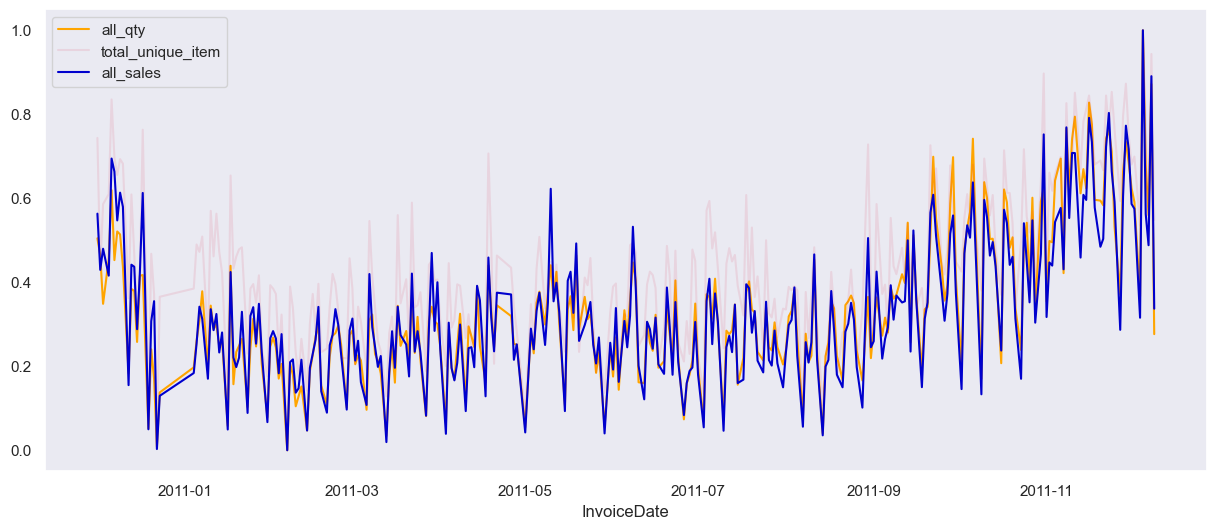

In [53]:
temp = sample.set_index(['InvoiceDate'])

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
temp_scaled = scaler.fit_transform(temp)
temp_scaled = pd.DataFrame(temp_scaled, columns=temp.columns, index=temp.index)
fig, ax = plt.subplots(figsize=(15, 6))
temp_scaled['all_qty'].plot(ax=ax, label='all_qty', c='orange')
temp_scaled['total_unique_item'].plot(ax=ax, label='total_unique_item', c='crimson', alpha=0.1)
temp_scaled['all_sales'].plot(ax=ax, label='all_sales', c='mediumblue')
plt.legend()
plt.show()

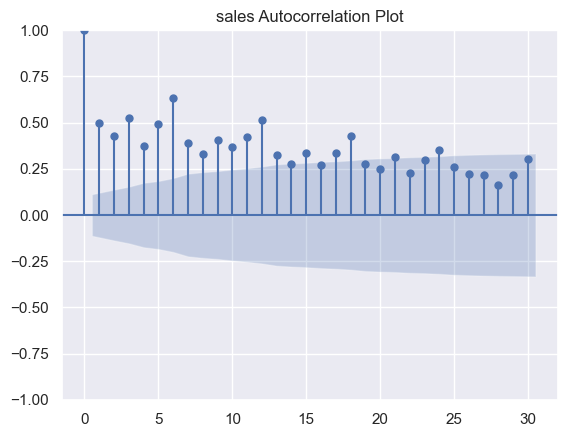

In [54]:
from statsmodels.graphics.tsaplots import plot_acf
temp = sample.drop(['all_qty', 'total_unique_item'], axis=1).set_index('InvoiceDate')
plot_acf(temp, lags=30)
plt.grid(True)
plt.title("sales Autocorrelation Plot")
plt.show()

There're seasonalities in the data every 3, 6, 12 days which make it potentials candidates for cross-validation to find optimal lag sales values.

cross-validation for lag values

In [55]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor

# scores_df = pd.DataFrame(columns=['model_test', 'r2_score', 'rmse', 'mae'])
model_list = []
r2_list = []
rmse_list = []
mae_list = []

tscv = TimeSeriesSplit(n_splits=5)
temp = sample.set_index(['InvoiceDate'])
for i in range(3, 13, 3):
    temp['lag_sales'] = temp['all_sales'].shift(i)
    X = temp.drop('all_sales', axis=1).dropna()
    y = temp.dropna()['all_sales']
    # model_tree = DecisionTreeRegressor()
    # model_LGBM = LGBMRegressor()
    models = [DecisionTreeRegressor(), LGBMRegressor()]
    scores_tree_r2 = []
    scores_tree_mse = []
    scores_tree_mae = []
    scores_LGBM_r2 = []
    scores_LGBM_mse = []
    scores_LGBM_mae = []
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        for model in models:
            model.fit(X_train, y_train)
            prediction = model.predict(X_test)
            if model == models[0]:
                scores_tree_r2.append(r2_score(y_test, prediction))
                scores_tree_mse.append(mean_squared_error(y_test, prediction, squared=False))
                scores_tree_mae.append(mean_absolute_error(y_test, prediction))
            else:
                scores_LGBM_r2.append(r2_score(y_test, prediction))
                scores_LGBM_mse.append(mean_squared_error(y_test, prediction, squared=False))
                scores_LGBM_mae.append(mean_absolute_error(y_test, prediction))
    # model
    model_list.append(f'DecisionTreeRegressor: lag {i}')
    model_list.append(f'LGBMRegressor: lag {i}')
    # R2
    r2_list.append(np.mean(scores_tree_r2).round(3))
    r2_list.append(np.mean(scores_LGBM_r2).round(3))
    # MSE
    rmse_list.append(np.mean(scores_tree_mse).round(3))
    rmse_list.append(np.mean(scores_LGBM_mse).round(3))
    # MAE
    mae_list.append(np.mean(scores_tree_mae).round(3))
    mae_list.append(np.mean(scores_LGBM_mae).round(3))
pd.DataFrame({'model_test': model_list, 'r2_score': r2_list, 'mse': rmse_list, 'mae': mae_list})

,model_test,r2_score,mse,mae
0,DecisionTreeRegressor: lag 3,0.719,3354.768,2594.611
1,LGBMRegressor: lag 3,0.629,3828.940,3034.737
2,DecisionTreeRegressor: lag 6,0.660,3728.868,2764.699
3,LGBMRegressor: lag 6,0.666,3636.358,2793.467
4,DecisionTreeRegressor: lag 9,0.726,3273.770,2446.676
5,LGBMRegressor: lag 9,0.637,3870.331,2945.675
6,DecisionTreeRegressor: lag 12,0.693,3525.677,2621.481
7,LGBMRegressor: lag 12,0.644,3885.215,2946.652


DecisionTree with 3 days lag sales, and LGBM with 6 days lag sales are outperforming other models regardless of checking overfitting.

cross-validation for lagged SMA values (Lagged Moving Average)

In [56]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit
from lightgbm import LGBMRegressor

# scores_df = pd.DataFrame(columns=['model_test', 'r2_score', 'rmse', 'mae'])
model_list = []
r2_list = []
rmse_list = []
mae_list = []

tscv = TimeSeriesSplit(n_splits=5)
temp = sample.set_index(['InvoiceDate'])
for i in range(1, 16):
    # temp['smma_sales'] = temp['lag_sales'].ewm(alpha=0.3).mean()
    temp['sma_sales'] = temp['all_sales'].rolling(window=i, min_periods=0).mean()
    temp['lag_sma_sales'] = temp['sma_sales'].shift(i)
    X = temp.drop(['all_sales', 'sma_sales'], axis=1).dropna()
    y = temp.dropna()['all_sales']
    # models = [DecisionTreeRegressor(), LGBMRegressor()]
    models = [LGBMRegressor()]
    # scores_tree_r2 = []
    # scores_tree_mse = []
    # scores_tree_mae = []
    scores_LGBM_r2 = []
    scores_LGBM_mse = []
    scores_LGBM_mae = []
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        for model in models:
            model.fit(X_train, y_train)
            prediction = model.predict(X_test)
            # if model == models[0]:
            #     scores_tree_r2.append(r2_score(y_test, prediction))
            #     scores_tree_mse.append(mean_squared_error(y_test, prediction, squared=False))
            #     scores_tree_mae.append(mean_absolute_error(y_test, prediction))
            # else:
            scores_LGBM_r2.append(r2_score(y_test, prediction))
            scores_LGBM_mse.append(mean_squared_error(y_test, prediction, squared=False))
            scores_LGBM_mae.append(mean_absolute_error(y_test, prediction))
    # model
    # model_list.append(f'DecisionTreeRegressor: smma {i} days')
    model_list.append(f'LGBMRegressor: lagged sma {i} days')
    # R2
    # r2_list.append(np.mean(scores_tree_r2).round(3))
    r2_list.append(np.mean(scores_LGBM_r2).round(3))
    # MSE
    # rmse_list.append(np.mean(scores_tree_mse).round(3))
    rmse_list.append(np.mean(scores_LGBM_mse).round(3))
    # MAE
    # mae_list.append(np.mean(scores_tree_mae).round(3))
    mae_list.append(np.mean(scores_LGBM_mae).round(3))
score_df = pd.DataFrame({'model_test': model_list, 'r2_score': r2_list, 'mse': rmse_list, 'mae': mae_list})

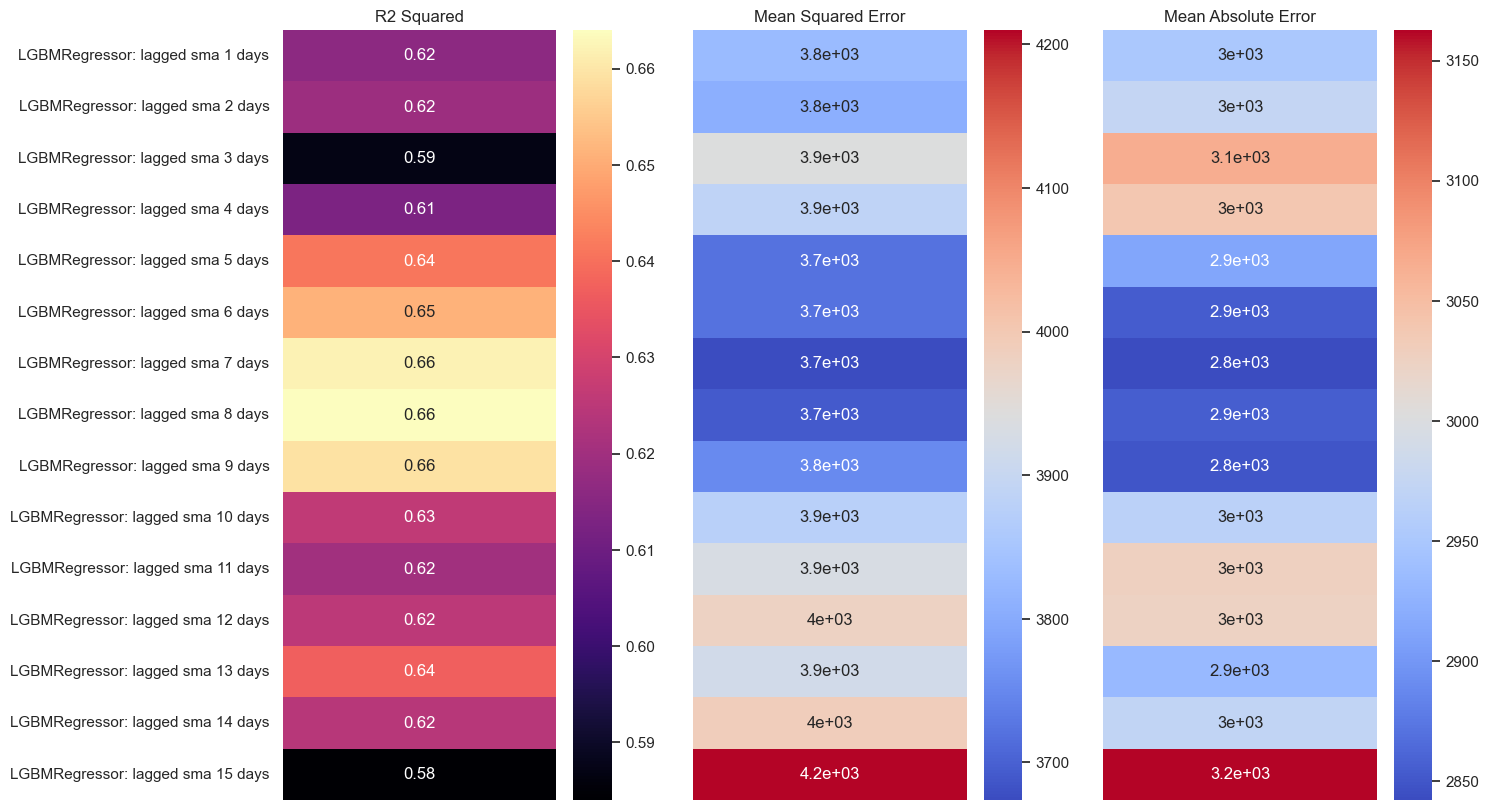

In [57]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 10), sharey=True)

sns.heatmap(pd.DataFrame(score_df.set_index('model_test').iloc[:, 0], score_df['model_test'].tolist()), cmap='magma', cbar=True, annot=True, ax=axs[0])
axs[0].set_title('R2 Squared')
axs[0].set_xticklabels('')

sns.heatmap(pd.DataFrame(score_df.set_index('model_test').iloc[:, 1], score_df['model_test'].tolist()), cmap='coolwarm', cbar=True, annot=True, ax=axs[1])
axs[1].set_title('Mean Squared Error')
axs[1].set_xticklabels('')

sns.heatmap(pd.DataFrame(score_df.set_index('model_test').iloc[:, 2], score_df['model_test'].tolist()), cmap='coolwarm', cbar=True, annot=True, ax=axs[2])
axs[2].set_title('Mean Absolute Error')
axs[2].set_xticklabels('')
plt.show()

7 Lagged SMA seems to be the best lagged SMA value for LGBM.

check refund and free items

- `Quantity` < 0 & `UnitPrice` > 0 are refund transactions and Discount (specified by `Description`).
- `Quantity` < 0 & `UnitPrice` == 0 are free items, but it specified as CustomerID 0. So, must be use the data from cleaned data before dropping defected data.

In [58]:
temp = pd.read_parquet('./data/ecomm_invoice_transaction.parquet')
temp = remove_outlier(df=temp, iqr_column='Quantity', zscore_column='UnitPrice')
temp = temp.loc[temp['Quantity'] < 0]

In [59]:
refund = temp.loc[(temp['UnitPrice'] > 0) & (temp['Description'] != 'Discount')]
discount = temp.loc[temp['Description'] == 'Discount']
free = temp.loc[(temp['UnitPrice'] == 0)]

In [60]:
# refund sales feature
agg_refund = refund.groupby(refund['InvoiceDate'].dt.date)\
                   .agg({'total_spend': 'sum',
                         'Quantity': 'sum'})\
                   .reset_index()
agg_refund = agg_refund.rename(columns={'total_spend': 'refund_sales', 'Quantity': 'refund_qty'})

# discount sales feature
agg_discount = discount.groupby(discount['InvoiceDate'].dt.date)\
                       .agg({'total_spend': 'sum'})\
                       .reset_index()
agg_discount = agg_discount.rename(columns={'total_spend': 'discount_sales'})

# free item feature
agg_free = free.groupby(free['InvoiceDate'].dt.date)\
               .agg({'Quantity': 'sum'})\
               .reset_index()
agg_free = agg_free.rename(columns={'Quantity': 'free_qty'})

Note: lagged SMA, or SMA then lagged giving the same result table.

In [61]:
sample = sample.merge(agg_refund, on='InvoiceDate', how='left')\
                .merge(agg_discount, on='InvoiceDate', how='left')\
                .merge(agg_free, on='InvoiceDate', how='left')
sample.head()

,InvoiceDate,all_qty,total_unique_item,all_sales,refund_sales,refund_qty,discount_sales,free_qty
0,2010-12-01,10626,1312,31352.84,-237.25,-86.0,-27.50,-10.0
1,2010-12-02,9858,849,24528.29,-377.22,-75.0,NaN,NaN
2,2010-12-03,7675,1078,27094.82,-55.45,-11.0,NaN,-40.0
3,2010-12-05,9691,1113,23831.20,-331.71,-31.0,-29.29,NaN
4,2010-12-06,12793,1448,38044.26,-780.08,-207.0,NaN,NaN


In [62]:
sample['refund_sales'] = sample['refund_sales'].fillna(0)
sample['refund_qty'] = sample['refund_qty'].fillna(0).astype(int)
sample['discount_sales'] = sample['discount_sales'].fillna(0)
sample['free_qty'] = sample['free_qty'].fillna(0).astype(int)
sample.head()

,InvoiceDate,all_qty,total_unique_item,all_sales,refund_sales,refund_qty,discount_sales,free_qty
0,2010-12-01,10626,1312,31352.84,-237.25,-86,-27.50,-10
1,2010-12-02,9858,849,24528.29,-377.22,-75,0.00,0
2,2010-12-03,7675,1078,27094.82,-55.45,-11,0.00,-40
3,2010-12-05,9691,1113,23831.20,-331.71,-31,-29.29,0
4,2010-12-06,12793,1448,38044.26,-780.08,-207,0.00,0


In [63]:
sample['total_sales'] = sample['all_sales'] + sample['refund_sales'] + sample['discount_sales']
sample['total_qty'] = sample['all_qty'] + sample['refund_qty'] + sample['free_qty']

add number of customer per cluster

In [64]:
temp = df.copy()
temp = temp.merge(rfm[['CustomerID', 'cluster']], on='CustomerID', how='left')
temp = temp.dropna(how='any') # where CustomerID is 0 leading to null cluster
temp['cluster'] = temp['cluster'].astype(int)

In [65]:
temp = temp.drop_duplicates(subset=['InvoiceNo'], keep='first')

In [66]:
count_cluster = temp.groupby(by=[temp['InvoiceDate'].dt.date, 'cluster']).agg({'cluster': 'count'}).unstack().fillna(0).astype(int)
count_cluster.columns = count_cluster.columns.droplevel()
count_cluster_plot = count_cluster
count_cluster = count_cluster.add_prefix('cluster_')
count_cluster = count_cluster.reset_index()
count_cluster = count_cluster.rename_axis(None, axis=1)
count_cluster.head()

,InvoiceDate,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,2010-12-01,0,20,8,2,23,6,17,1,11,23
1,2010-12-02,1,38,6,1,27,1,23,1,10,33
2,2010-12-03,0,3,5,1,16,2,6,0,9,12
3,2010-12-05,0,10,9,0,32,10,6,5,2,15
4,2010-12-06,0,11,8,3,25,5,6,0,13,32


Heatmap can tell how frequent they come to buy

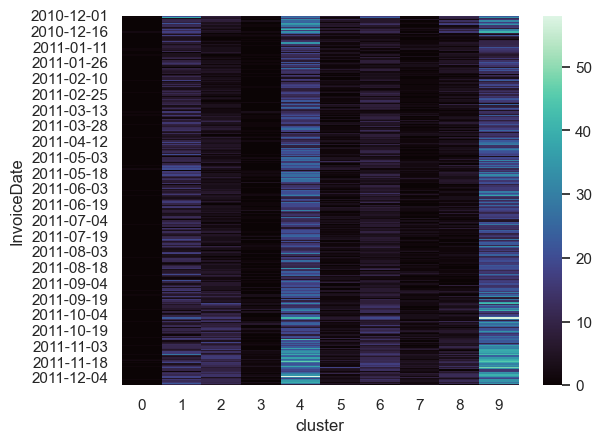

In [67]:
sns.heatmap(count_cluster_plot, cmap="mako")
plt.show()

In [68]:
sample = sample.merge(count_cluster, on='InvoiceDate', how='left')
sample

,InvoiceDate,all_qty,total_unique_item,all_sales,refund_sales,refund_qty,discount_sales,free_qty,total_sales,total_qty,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,2010-12-01,10626,1312,31352.84,-237.25,-86,-27.50,-10,31088.09,10530,0,20,8,2,23,6,17,1,11,23
1,2010-12-02,9858,849,24528.29,-377.22,-75,0.00,0,24151.07,9783,1,38,6,1,27,1,23,1,10,33
2,2010-12-03,7675,1078,27094.82,-55.45,-11,0.00,-40,27039.37,7624,0,3,5,1,16,2,6,0,9,12
3,2010-12-05,9691,1113,23831.20,-331.71,-31,-29.29,0,23470.20,9660,0,10,9,0,32,10,6,5,2,15
4,2010-12-06,12793,1448,38044.26,-780.08,-207,0.00,0,37264.18,12586,0,11,8,3,25,5,6,0,13,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,2011-12-05,19996,1693,53624.28,-173.94,-68,0.00,-9,53450.34,19919,1,15,11,2,31,3,13,3,9,34
301,2011-12-06,13914,1358,31302.96,-1034.38,-299,0.00,0,30268.58,13615,0,12,11,0,36,4,11,4,12,34
302,2011-12-07,11667,980,27521.99,-323.42,-70,0.00,-12,27198.57,11585,0,15,10,3,39,1,4,2,7,28
303,2011-12-08,17571,1609,48046.01,-555.16,-206,0.00,0,47490.85,17365,0,22,12,1,30,5,8,2,11,34


Fast Fourier Transform for Time series forecasting

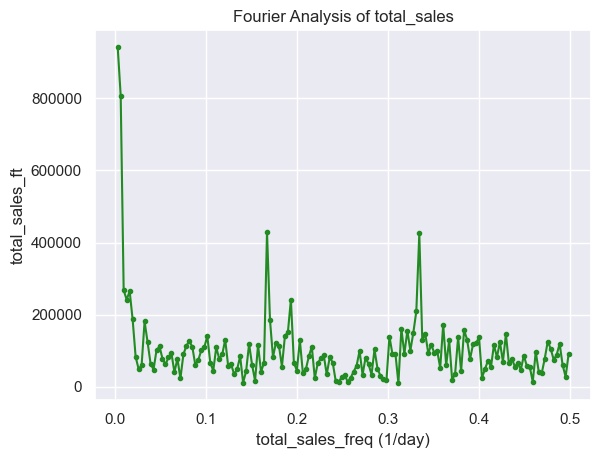

In [69]:
from numpy.fft import rfft, rfftfreq
nobs = len(sample['total_sales'])
sales_ft = np.abs(rfft(sample['total_sales']))
sales_freq = rfftfreq(nobs)
plt.figure()
plt.plot(sales_freq[1:], sales_ft[1:], c='forestgreen', marker='o', markersize=3)
plt.grid(True)
plt.ylabel("total_sales_ft")
plt.xlabel("total_sales_freq (1/day)")
plt.title("Fourier Analysis of total_sales")
plt.show()

In [70]:
# y
index = np.argsort(sales_ft)[-10:][::-1]
print(sales_ft[index])
# sales_ft[1:]
# x
days_periodic = 1/sales_freq[index]
for i, e in enumerate(days_periodic):
    print(f"Amplitude rank {i}: cycle {e.round(3)} days")
# sales_freq[1:]

[5825361.434       942307.99366909  807722.38597154  429367.6480759
  425255.76035353  267980.57807611  265100.91094759  241503.09642724
  241361.84381633  208997.75966371]
Amplitude rank 0: cycle inf days
Amplitude rank 1: cycle 305.0 days
Amplitude rank 2: cycle 152.5 days
Amplitude rank 3: cycle 5.98 days
Amplitude rank 4: cycle 2.99 days
Amplitude rank 5: cycle 101.667 days
Amplitude rank 6: cycle 61.0 days
Amplitude rank 7: cycle 5.169 days
Amplitude rank 8: cycle 76.25 days
Amplitude rank 9: cycle 3.02 days


C:\Users\HP\AppData\Local\Temp\ipykernel_14484\3582315358.py:6: RuntimeWarning: divide by zero encountered in divide
  days_periodic = 1/sales_freq[index]


We can see that fast fourier transform approach is able to capture the trend and seasonality of the time series data resulting in 305, 152, 6, 3 days respectively.

Which cycle to use depends on the business requirement. For example, if we want to forecast sales in long-term, we should use 152, or 305 days cycle.

In my case, I'm gonna use 6 days cycle for short-term forecasting.

add day & holiday feature

In [71]:
sample.head()

,InvoiceDate,all_qty,total_unique_item,all_sales,refund_sales,refund_qty,discount_sales,free_qty,total_sales,total_qty,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,2010-12-01,10626,1312,31352.84,-237.25,-86,-27.50,-10,31088.09,10530,0,20,8,2,23,6,17,1,11,23
1,2010-12-02,9858,849,24528.29,-377.22,-75,0.00,0,24151.07,9783,1,38,6,1,27,1,23,1,10,33
2,2010-12-03,7675,1078,27094.82,-55.45,-11,0.00,-40,27039.37,7624,0,3,5,1,16,2,6,0,9,12
3,2010-12-05,9691,1113,23831.20,-331.71,-31,-29.29,0,23470.20,9660,0,10,9,0,32,10,6,5,2,15
4,2010-12-06,12793,1448,38044.26,-780.08,-207,0.00,0,37264.18,12586,0,11,8,3,25,5,6,0,13,32


In [72]:
def create_timeseries_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create time series features based on time series index.
    """
    df_temp = df.copy()
    df_temp['InvoiceDate'] = pd.to_datetime(df_temp['InvoiceDate'])
    df_temp = df_temp.set_index('InvoiceDate')
    df_temp['dayofweek'] = df_temp.index.dayofweek
    df_temp['day_name'] = df_temp.index.day_name()
    df_temp['month'] = df_temp.index.month
    df_temp['year'] = df_temp.index.year
    df_temp['dayofmonth'] = df_temp.index.day
    df_temp = df_temp.reset_index()
    return df_temp

In [73]:
sample = create_timeseries_features(sample)
sample.head()

,InvoiceDate,all_qty,total_unique_item,all_sales,refund_sales,refund_qty,discount_sales,free_qty,total_sales,total_qty,...,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,dayofweek,day_name,month,year,dayofmonth
0,2010-12-01,10626,1312,31352.84,-237.25,-86,-27.50,-10,31088.09,10530,...,6,17,1,11,23,2,Wednesday,12,2010,1
1,2010-12-02,9858,849,24528.29,-377.22,-75,0.00,0,24151.07,9783,...,1,23,1,10,33,3,Thursday,12,2010,2
2,2010-12-03,7675,1078,27094.82,-55.45,-11,0.00,-40,27039.37,7624,...,2,6,0,9,12,4,Friday,12,2010,3
3,2010-12-05,9691,1113,23831.20,-331.71,-31,-29.29,0,23470.20,9660,...,10,6,5,2,15,6,Sunday,12,2010,5
4,2010-12-06,12793,1448,38044.26,-780.08,-207,0.00,0,37264.18,12586,...,5,6,0,13,32,0,Monday,12,2010,6


dropping some column refers to pearson correlation heatmap

In [74]:
sample = sample.drop(columns=['all_sales', 'all_qty', 'day_name'])
sample.head()

,InvoiceDate,total_unique_item,refund_sales,refund_qty,discount_sales,free_qty,total_sales,total_qty,cluster_0,cluster_1,...,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,dayofweek,month,year,dayofmonth
0,2010-12-01,1312,-237.25,-86,-27.50,-10,31088.09,10530,0,20,...,23,6,17,1,11,23,2,12,2010,1
1,2010-12-02,849,-377.22,-75,0.00,0,24151.07,9783,1,38,...,27,1,23,1,10,33,3,12,2010,2
2,2010-12-03,1078,-55.45,-11,0.00,-40,27039.37,7624,0,3,...,16,2,6,0,9,12,4,12,2010,3
3,2010-12-05,1113,-331.71,-31,-29.29,0,23470.20,9660,0,10,...,32,10,6,5,2,15,6,12,2010,5
4,2010-12-06,1448,-780.08,-207,0.00,0,37264.18,12586,0,11,...,25,5,6,0,13,32,0,12,2010,6


In [75]:
import requests
api_key = 'L1cyqa4q8XHDDihUhJv9lw==wOOOJgE4bezMp4Ql'
country = 'us'
years = ['2010', '2011']
holidays = pd.DataFrame()
for year in years:
    api_url = f'https://api.api-ninjas.com/v1/holidays?country={country}&year={year}'
    response = requests.get(api_url, headers={'X-Api-Key': api_key})
    if response.status_code == requests.codes.ok:
        print(response.status_code)
        resp = response.json()
        holidays = pd.concat([holidays, pd.json_normalize(resp)], axis=0)
    else:
        print("Error:", response.status_code, response.text)

200
200


In [76]:
holidays['is_holiday'] = 1
holidays = holidays.rename(columns={'date': 'InvoiceDate'})
holidays.head()

,country,iso,year,InvoiceDate,day,name,type,is_holiday
0,United States,US,2010,2010-09-24,Friday,American Indian Heritage Day,STATE_OBSERVATION,1
1,United States,US,2010,2010-05-09,Sunday,Mother's Day,OBSERVANCE,1
2,United States,US,2010,2010-02-01,Monday,First Day of Black History Month,ANNUAL_MONTHLY_OBSERVANCE,1
3,United States,US,2010,2010-03-30,Tuesday,Doctors' Day,OBSERVANCE,1
4,United States,US,2010,2010-08-11,Wednesday,Ramadan Starts,MUSLIM,1


In [77]:
holidays['InvoiceDate'] = pd.to_datetime(holidays['InvoiceDate']).apply(lambda x: x.date())

In [78]:
temp = sample.copy()
temp['InvoiceDate'] = pd.to_datetime(temp['InvoiceDate']).apply(lambda x: x.date())
temp = temp.merge(holidays[['InvoiceDate', 'is_holiday']], on='InvoiceDate', how='left')
temp.head()

,InvoiceDate,total_unique_item,refund_sales,refund_qty,discount_sales,free_qty,total_sales,total_qty,cluster_0,cluster_1,...,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,dayofweek,month,year,dayofmonth,is_holiday
0,2010-12-01,1312,-237.25,-86,-27.50,-10,31088.09,10530,0,20,...,6,17,1,11,23,2,12,2010,1,1.0
1,2010-12-02,849,-377.22,-75,0.00,0,24151.07,9783,1,38,...,1,23,1,10,33,3,12,2010,2,1.0
2,2010-12-03,1078,-55.45,-11,0.00,-40,27039.37,7624,0,3,...,2,6,0,9,12,4,12,2010,3,1.0
3,2010-12-05,1113,-331.71,-31,-29.29,0,23470.20,9660,0,10,...,10,6,5,2,15,6,12,2010,5,1.0
4,2010-12-06,1448,-780.08,-207,0.00,0,37264.18,12586,0,11,...,5,6,0,13,32,0,12,2010,6,1.0


In [79]:
temp['is_holiday'] = temp['is_holiday'].fillna(0)

In [80]:
sample = temp

add lagging feature

C:\Users\HP\AppData\Local\Temp\ipykernel_14484\2427856850.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sample.corr(method='pearson'), cmap='coolwarm', annot=True, fmt='.2f', ax=axi)


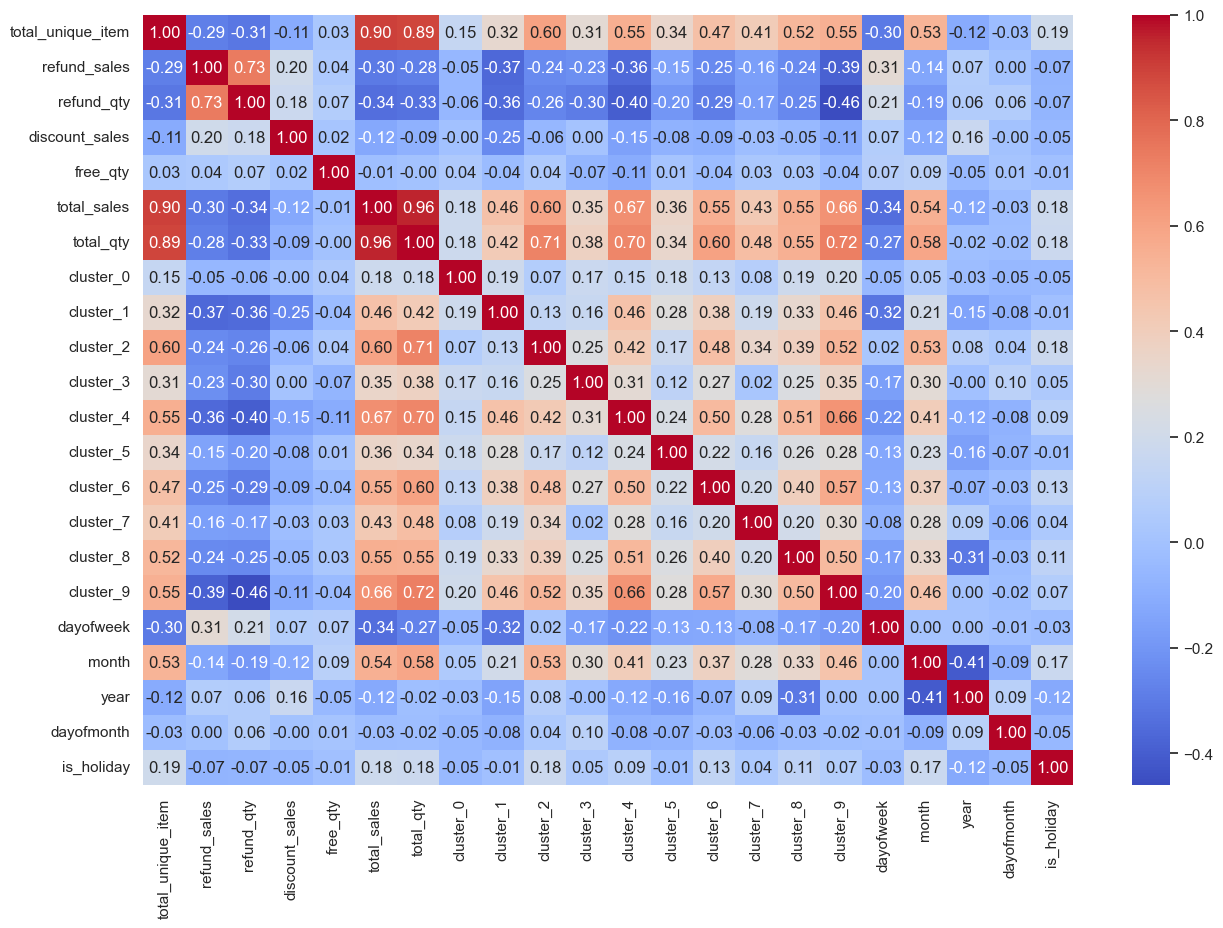

In [81]:
fig, axi = plt.subplots(figsize=(15, 10))
sns.heatmap(sample.corr(method='pearson'), cmap='coolwarm', annot=True, fmt='.2f', ax=axi)
plt.show()

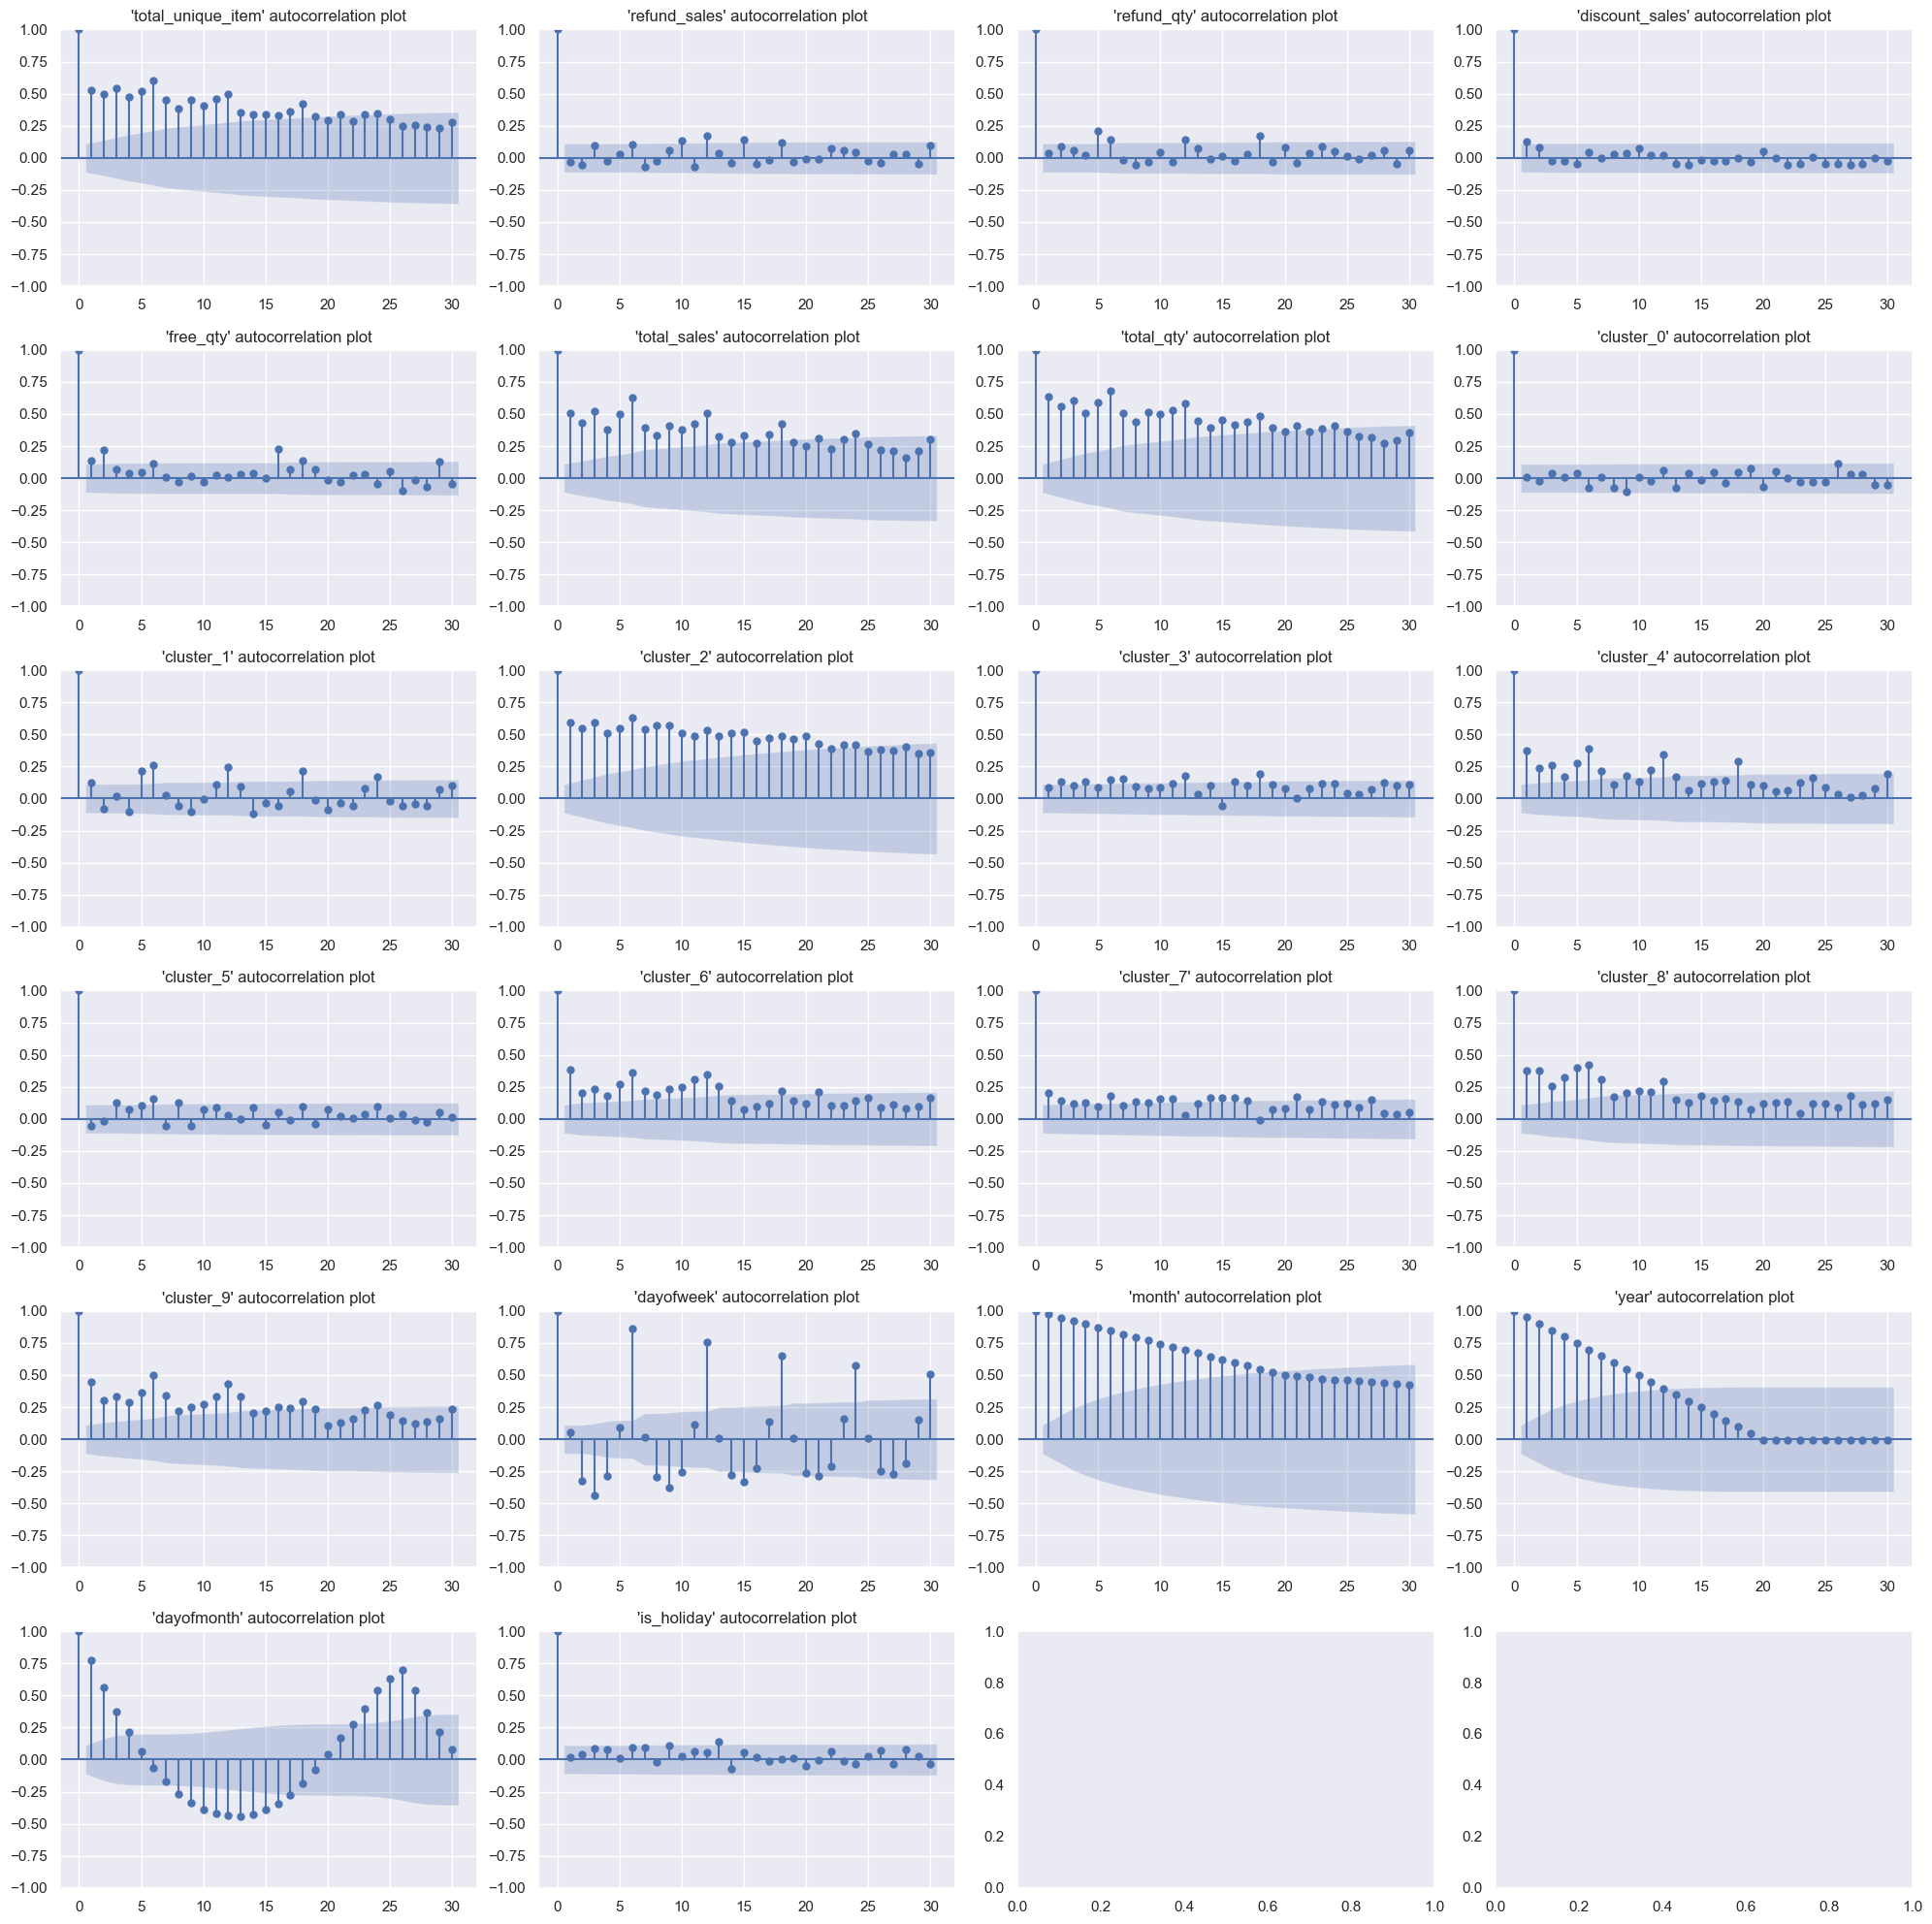

In [82]:
temp = sample.set_index(['InvoiceDate'])
fig, ax = plt.subplots(int(len(temp.columns)/4)+1, 4)
ax = ax.flatten()
fig.set_size_inches(20, 20)
for i, col in enumerate(temp.columns):
    series = temp[col].values
    plot_acf(series, lags=round(30), ax=ax[i])
    ax[i].grid()
    ax[i].set_title(f"'{col}' autocorrelation plot")
plt.tight_layout()
plt.show()

From Autocorrelation plot, we can tell that
- `total_unique_item` should lag 6 days
- `refund_sales` should lag 12 days
- `refund_qty` should lag 5 days
- `discount_sales` can't be used for lag
- `free_qty` should be lag 2, or 16 days
- `total_sales` lag 6 days
- `total_qty` as a target variable, can't be use for lag
- `cluster_0` can't be used for lag
- `cluster_1` lag 6 days
- `cluster_2` lag 6 days
- `cluster_3` lag 12 days
- `cluster_4` lag 6 days
- `cluster_5` lag 6 days
- `cluster_6` lag 6 days
- `cluster_7` lag 6 days
- `cluster_8` lag 6 days
- `cluster_9` lag 6 days
- date feature shouldn't be lagged

In [83]:
# sma from cross-validation
sample['lag_sma_sales'] = sample['total_sales'].rolling(window=7, min_periods=0).mean().shift(7)

# lagged features
sample['total_unique_item'] = sample['total_unique_item'].shift(6)
sample['refund_sales'] = sample['refund_sales'].shift(12)
sample['free_qty'] = sample['free_qty'].shift(16)
sample['total_sales'] = sample['total_sales'].shift(6)
sample['cluster_1'] = sample['cluster_1'].shift(6)
sample['cluster_2'] = sample['cluster_2'].shift(6)
sample['cluster_3'] = sample['cluster_3'].shift(12)
sample['cluster_4'] = sample['cluster_4'].shift(6)
sample['cluster_5'] = sample['cluster_5'].shift(6)
sample['cluster_6'] = sample['cluster_6'].shift(6)
sample['cluster_7'] = sample['cluster_7'].shift(6)
sample['cluster_8'] = sample['cluster_8'].shift(6)
sample['cluster_9'] = sample['cluster_9'].shift(6)

# rename columns
sample = sample.rename(columns={
            'total_sales': 'lag_total_sales', 
            'total_unique_item': 'lag_total_unique_item', 
            'refund_sales': 'lag_refund_sales', 
            'free_qty': 'lag_free_qty', 
            'cluster_1': 'lag_cluster_1', 
            'cluster_2': 'lag_cluster_2', 
            'cluster_3': 'lag_cluster_3', 
            'cluster_4': 'lag_cluster_4', 
            'cluster_5': 'lag_cluster_5', 
            'cluster_6': 'lag_cluster_6', 
            'cluster_7': 'lag_cluster_7', 
            'cluster_8': 'lag_cluster_8', 
            'cluster_9': 'lag_cluster_9'})
sample.head()

,InvoiceDate,lag_total_unique_item,lag_refund_sales,refund_qty,discount_sales,lag_free_qty,lag_total_sales,total_qty,cluster_0,lag_cluster_1,...,lag_cluster_6,lag_cluster_7,lag_cluster_8,lag_cluster_9,dayofweek,month,year,dayofmonth,is_holiday,lag_sma_sales
0,2010-12-01,NaN,NaN,-86,-27.50,NaN,NaN,10530,0,NaN,...,NaN,NaN,NaN,NaN,2,12,2010,1,1.0,NaN
1,2010-12-02,NaN,NaN,-75,0.00,NaN,NaN,9783,1,NaN,...,NaN,NaN,NaN,NaN,3,12,2010,2,1.0,NaN
2,2010-12-03,NaN,NaN,-11,0.00,NaN,NaN,7624,0,NaN,...,NaN,NaN,NaN,NaN,4,12,2010,3,1.0,NaN
3,2010-12-05,NaN,NaN,-31,-29.29,NaN,NaN,9660,0,NaN,...,NaN,NaN,NaN,NaN,6,12,2010,5,1.0,NaN
4,2010-12-06,NaN,NaN,-207,0.00,NaN,NaN,12586,0,NaN,...,NaN,NaN,NaN,NaN,0,12,2010,6,1.0,NaN


train test model

In [84]:
# separate data into input and output
X = sample.drop(['total_qty'], axis=1)
y = sample['total_qty']

# Split data into train and test sets
train_size = 0.8
X_train = X[:int(len(X)*train_size)]
X_test = X[int(len(X)*train_size):]
y_train = y[:int(len(y)*train_size)]
y_test = y[int(len(y)*train_size):]

# set date as index
X_train['InvoiceDate'] = pd.to_datetime(X_train['InvoiceDate'])
X_test['InvoiceDate'] = pd.to_datetime(X_test['InvoiceDate'])
X_train = X_train.set_index('InvoiceDate')
X_test = X_test.set_index('InvoiceDate')

In [85]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV

tscv = TimeSeriesSplit(n_splits=10)

model = LGBMRegressor()
# model.fit(X_train, y_train)

search = RandomizedSearchCV(
    model,
    param_distributions={
        'n_estimators': [100, 200, 300, 400, 500],
        'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
        'num_leaves': [10, 20, 30, 40, 50],
        'max_depth': [5, 10, 15, 20, 25],
        # 'min_child_samples': [10, 20, 30, 40, 50],
        # 'min_child_weight': [0.001, 0.01, 0.1, 1, 10],
        # 'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
        # 'reg_alpha': [0.001, 0.01, 0.1, 1, 10],
        # 'reg_lambda': [0.001, 0.01, 0.1, 1, 10],
        'random_state': [0],
    },
    cv=tscv,
    n_iter=100,
    scoring='neg_mean_squared_error',
    verbose=1,
    random_state=0,
)

search.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None),
                   estimator=LGBMRegressor(), n_iter=100,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [5, 10, 15, 20, 25],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'num_leaves': [10, 20, 30, 40, 50],
                                        'random_state': [0]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=1)

In [86]:
best_params = search.best_params_
print(best_params)

{'random_state': 0, 'num_leaves': 20, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01}


In [87]:
# model = LGBMRegressor(**best_params)
model = LGBMRegressor(n_estimators=1000, max_depth=10, learning_rate=0.01, num_leaves=100, random_state=0)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('RMSE:', mean_squared_error(y_test, prediction, squared=False))

RMSE: 4884.230183216473


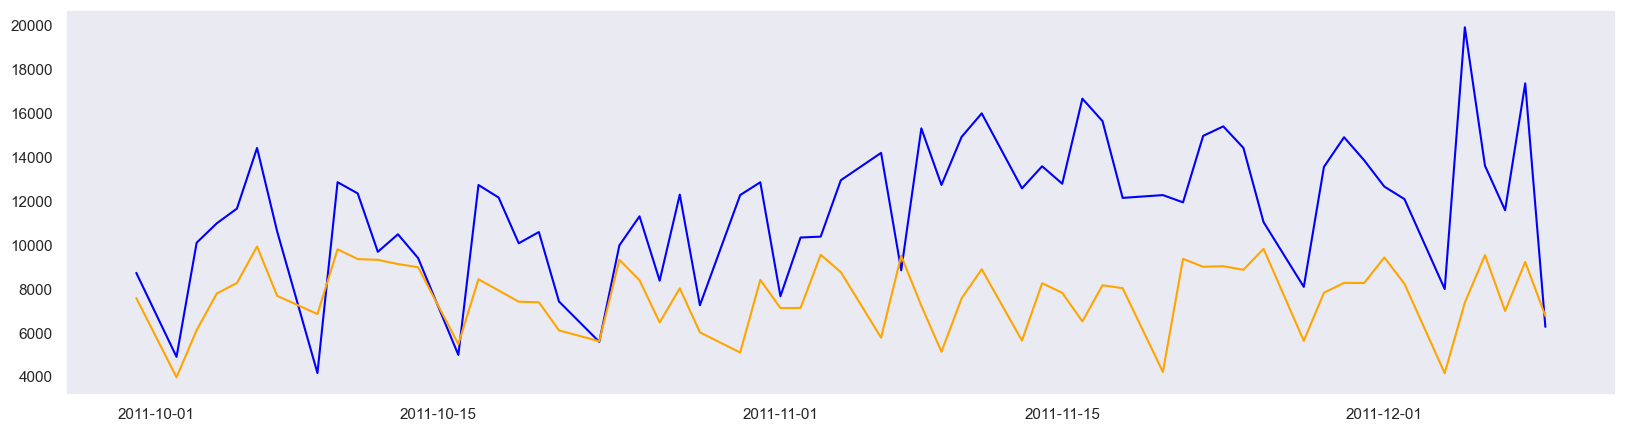

In [88]:
temp = X_test.copy()
temp['total_qty'] = np.array(y_test)
temp['prediction'] = np.array(prediction)
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(temp['total_qty'], color='blue', label='total_qty')
ax.plot(temp['prediction'], color='orange', label='prediction')
plt.show()

Evaluate

In [89]:
# baseline = np.zeros(y_test.shape[0])
baseline = np.mean(y_test)
baseline = np.full(y_test.shape[0], baseline)

In [90]:
# baseline
print('RMSE Baseline :', mean_squared_error(y_test, baseline, squared=False))

# model perform
print('RMSE LGBM     :', mean_squared_error(y_test, prediction, squared=False))

print()

from sklearn.metrics import mean_absolute_percentage_error
print('MAPE Baseline : ', mean_absolute_percentage_error(y_test, baseline))
print('MAPE LGBM     : ', mean_absolute_percentage_error(y_test, prediction))

RMSE Baseline : 3170.1427173171714
RMSE LGBM     : 4884.230183216473

MAPE Baseline :  0.27161576245856606
MAPE LGBM     :  0.3228549806272227


save model

In [91]:
import pickle

pickle.dump(km, open('./model/km_model.pkl','wb'))
pickle.dump(tuned_model_xgb, open('./model/xgb_model.pkl','wb'))
pickle.dump(model, open('./model/lgbm_model.pkl','wb'))

### Churn Prediction

from customer segmentation part, we obtained the dataframe that represent customer profile. We're gonna use this dataframe to predict churn. But, what more concern is that we don't have the churn label for this dataframe. So, we need to create the label first. The criterion to label the customer as churn is that the customer hasn't made any purchase for ...